In [305]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings # This library will be used to ignore some warnings
warnings.filterwarnings('ignore')

import calendar
sns.set(style = "darkgrid")

# To display all the columns
pd.options.display.max_columns = None
# To display all the rows
pd.options.display.max_rows = None

# Set Precision to 8 for better readability
pd.set_option('precision', 8)
pd.options.display.float_format = '{:.4f}'.format

In [306]:
loan = pd.read_csv('/Users/manish.konduri/Desktop/Manish_UpGrad/Lending Club Case Study -1/Files/loan.csv')


In [307]:
loan.shape

(39717, 111)

#### The Data has total 39717 rows, 111 columns
   - We have to find out what columns are utilizable and what rows are utilizable to do this we need to do
## Data Cleaning

1. We need to remove all the columns which have all values as Null. To do this we are finding the null value percentage of each columns
    

In [308]:
(loan.isna().sum()/len(loan))*100

id                                 0.0000
member_id                          0.0000
loan_amnt                          0.0000
funded_amnt                        0.0000
funded_amnt_inv                    0.0000
term                               0.0000
int_rate                           0.0000
installment                        0.0000
grade                              0.0000
sub_grade                          0.0000
emp_title                          6.1913
emp_length                         2.7066
home_ownership                     0.0000
annual_inc                         0.0000
verification_status                0.0000
issue_d                            0.0000
loan_status                        0.0000
pymnt_plan                         0.0000
url                                0.0000
desc                              32.5805
purpose                            0.0000
title                              0.0277
zip_code                           0.0000
addr_state                        

#### Majority of the Columns have Null 100% Null values, So these columns can't give any insights, So we can drop these columns.

In [309]:
loan.dropna(axis=1, how="all", inplace=True) #Dropping all the columns which have all the values as null

#### Deleted 111-57 = 54 columns because all the column values are Null

In [310]:
loan.shape

(39717, 57)

#### Running the Null Percentage Finder again

In [311]:
(loan.isna().sum()/len(loan))*100

id                            0.0000
member_id                     0.0000
loan_amnt                     0.0000
funded_amnt                   0.0000
funded_amnt_inv               0.0000
term                          0.0000
int_rate                      0.0000
installment                   0.0000
grade                         0.0000
sub_grade                     0.0000
emp_title                     6.1913
emp_length                    2.7066
home_ownership                0.0000
annual_inc                    0.0000
verification_status           0.0000
issue_d                       0.0000
loan_status                   0.0000
pymnt_plan                    0.0000
url                           0.0000
desc                         32.5805
purpose                       0.0000
title                         0.0277
zip_code                      0.0000
addr_state                    0.0000
dti                           0.0000
delinq_2yrs                   0.0000
earliest_cr_line              0.0000
i

#### The Rows "desc", "mths_since_last_delinq", "mths_since_last_record", "next_pymnt_d" has Null values greater than 30%, So we can drop these columns because of the high Null Value Percentage (1/3rd of the values are Nulls)

In [312]:
loan.drop(["mths_since_last_delinq","desc","mths_since_last_record","next_pymnt_d"], axis = 1, inplace = True)

In [313]:
loan.shape

(39717, 53)

### Need to update this list when we encounter an unused column
The below columns doesn't provide much insights about the data, So we can drop them 
- member_id, 
- url, 
- zip_code, 
- policy_code, 
- title 

The below columns are Customer behaviour variables, So we can drop these values
- delinq_2yrs ,
- earliest_cr_line ,
- inq_last_6mths ,
- open_acc,pub_rec ,
- revol_bal ,
- revol_util ,
- total_acc ,
- out_prncp, 
- out_prncp_inv ,
- total_pymnt ,
- total_pymnt_inv ,
- total_rec_prncp, 
- total_rec_int ,
- total_rec_late_fee ,
- recoveries ,
- collection_recovery_fee ,
- last_pymnt_d ,
- last_pymnt_amnt,
- last_credit_pull_d ,
- application_type, 
- loan.collections_12_mths_ex_med, 
- acc_now_delinq, chargeoff_within_12_mths, 
- delinq_amnt, tax_liens


In [314]:
loan.drop(["member_id","url","zip_code", "policy_code", "title", "delinq_2yrs","earliest_cr_line","inq_last_6mths","open_acc","pub_rec","revol_bal","revol_util","total_acc","out_prncp","out_prncp_inv","total_pymnt","total_pymnt_inv","total_rec_prncp","total_rec_int","total_rec_late_fee","recoveries","collection_recovery_fee","last_pymnt_d","last_pymnt_amnt","last_credit_pull_d","application_type", "id"], axis = 1, inplace = True)

In [315]:
loan.drop(["collections_12_mths_ex_med", "acc_now_delinq", "chargeoff_within_12_mths", "delinq_amnt", "tax_liens"], axis = 1, inplace = True)

In [316]:
loan.shape

(39717, 21)

## Data Cleaning - Filtering Data

In [317]:
loan.dtypes

loan_amnt                 int64
funded_amnt               int64
funded_amnt_inv         float64
term                     object
int_rate                 object
installment             float64
grade                    object
sub_grade                object
emp_title                object
emp_length               object
home_ownership           object
annual_inc              float64
verification_status      object
issue_d                  object
loan_status              object
pymnt_plan               object
purpose                  object
addr_state               object
dti                     float64
initial_list_status      object
pub_rec_bankruptcies    float64
dtype: object

#### 1.Cleaning the "int_rate" colums
- int_rate is of type object because of the character "%", We need to remove this

In [318]:
#Check if int_rate column has any missing values?
loan.int_rate.isnull().sum()

0

In [319]:
#The Missing values are 0, So we can directly work on the data
loan["int_rate"] = loan["int_rate"].apply(lambda x : x.split("%")[0])

#Checking the Data Type of int_rate
print(loan.int_rate.dtypes)


object


In [320]:
#The int_rate should be converted to float because the int_rate would always be float
loan["int_rate"] = pd.to_numeric(loan["int_rate"])

#Checking the Data Type of int_rate again
print(loan.int_rate.dtypes)

#Fixed the int_rate column

float64


#### 2. Cleaning the "home_ownership" column
- "home_ownership" column has the values "Mortage", "Other", "Own", "Rent". We have to either drop the Rows where the home_ownership is None or replace it with any other valid values.
- If we observe there is another value present in home_ownership column i.e "Others", We can modify the None values to "Others". By doing this the meaning of the data won't be changed.

In [321]:
#Checking for None Values in "home_ownership"
loan.home_ownership.value_counts()

RENT        18899
MORTGAGE    17659
OWN          3058
OTHER          98
NONE            3
Name: home_ownership, dtype: int64

In [322]:
#Replacing the None values in "home_ownership" with "OTHER"
loan["home_ownership"].replace("NONE", "OTHER", inplace=True)
loan.home_ownership.value_counts()

RENT        18899
MORTGAGE    17659
OWN          3058
OTHER         101
Name: home_ownership, dtype: int64

#### 3. Cleaning the "emp_length" column

In [323]:
#Checking for Null Values in emp_length column
loan["emp_length"].isnull().sum()

1075

- There are 1072 Rows in loan dataframe where emp_length is NULL.
- We can either drop these rows are fillup the Null values with any mathematically calculated values


In [324]:
#Checking the type of emp_length column
print(loan.emp_length.dtypes)

object


In [325]:
#As emp_length column is object we can find the mode of the data
print("Mode of the emp_length column : " + loan.emp_length.mode()[0])

Mode of the emp_length column : 10+ years


In [326]:
#We can fillup the emp_length with the Mode value
loan.emp_length.fillna(loan.emp_length.mode()[0], inplace=True)

#Checking for Null Values in emp_length column again
loan["emp_length"].isnull().sum()

0

In [327]:
#checking the values of emp_length column
loan["emp_length"].value_counts()

10+ years    9954
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: emp_length, dtype: int64

In [328]:
#Modifying the emp_length to Proper String Values
loan.emp_length = pd.to_numeric(loan.emp_length.apply(lambda x: 0 if "<" in x else (x.split('+')[0] if "+" in x else x.split()[0])))

## Derived Metrics
- Deriving Additional Data from columns
    - "issue_d" is the column which is in the format "MMM-YY". Need to dervied Month column and Year Column

In [329]:
#Checking the type of issue_d column
print(loan.issue_d.dtypes)

object


In [330]:
#Creating new columns "issued_Month", "issued_Year" from "issue_d" column

loan["issued_Month"] = pd.to_datetime(loan["issue_d"], format='%b-%y').dt.month
loan["issued_Year"] = pd.to_datetime(loan["issue_d"], format='%b-%y').dt.year

In [331]:
#Checking for issued_Month and issued_Year columns
loan.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,addr_state,dti,initial_list_status,pub_rec_bankruptcies,issued_Month,issued_Year
0,5000,5000,4975.0000,36 months,10.6500,162.8700,B,B2,NaN,10,RENT,24000.0000,Verified,Dec-11,Fully Paid,n,credit_card,AZ,27.6500,f,0.0000,12,2011
1,2500,2500,2500.0000,60 months,15.2700,59.8300,C,C4,Ryder,0,RENT,30000.0000,Source Verified,Dec-11,Charged Off,n,car,GA,1.0000,f,0.0000,12,2011
2,2400,2400,2400.0000,36 months,15.9600,84.3300,C,C5,NaN,10,RENT,12252.0000,Not Verified,Dec-11,Fully Paid,n,small_business,IL,8.7200,f,0.0000,12,2011
3,10000,10000,10000.0000,36 months,13.4900,339.3100,C,C1,AIR RESOURCES BOARD,10,RENT,49200.0000,Source Verified,Dec-11,Fully Paid,n,other,CA,20.0000,f,0.0000,12,2011
4,3000,3000,3000.0000,60 months,12.6900,67.7900,B,B5,University Medical Group,1,RENT,80000.0000,Source Verified,Dec-11,Current,n,other,OR,17.9400,f,0.0000,12,2011


In [332]:
#Converting Month from Number representation to Integer representation
loan["issued_Month"] = loan["issued_Month"].apply(lambda x : calendar.month_abbr[x])

In [333]:
#Checking the issued_Month column
loan.issued_Month.head()

0    Dec
1    Dec
2    Dec
3    Dec
4    Dec
Name: issued_Month, dtype: object

In [334]:
# As we have derived two columns from issue_d column, Now we can safely drop issue_d column
loan.drop(["issue_d"], axis = 1, inplace = True)

In [335]:
loan.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,loan_status,pymnt_plan,purpose,addr_state,dti,initial_list_status,pub_rec_bankruptcies,issued_Month,issued_Year
0,5000,5000,4975.0000,36 months,10.6500,162.8700,B,B2,NaN,10,RENT,24000.0000,Verified,Fully Paid,n,credit_card,AZ,27.6500,f,0.0000,Dec,2011
1,2500,2500,2500.0000,60 months,15.2700,59.8300,C,C4,Ryder,0,RENT,30000.0000,Source Verified,Charged Off,n,car,GA,1.0000,f,0.0000,Dec,2011
2,2400,2400,2400.0000,36 months,15.9600,84.3300,C,C5,NaN,10,RENT,12252.0000,Not Verified,Fully Paid,n,small_business,IL,8.7200,f,0.0000,Dec,2011
3,10000,10000,10000.0000,36 months,13.4900,339.3100,C,C1,AIR RESOURCES BOARD,10,RENT,49200.0000,Source Verified,Fully Paid,n,other,CA,20.0000,f,0.0000,Dec,2011
4,3000,3000,3000.0000,60 months,12.6900,67.7900,B,B5,University Medical Group,1,RENT,80000.0000,Source Verified,Current,n,other,OR,17.9400,f,0.0000,Dec,2011


In [336]:
loan.shape

(39717, 22)

## Plotting the columns to find the Outliers

1. Plotting the int_rate column for Outliers

In [337]:
#Describing the int_rate column
loan["int_rate"].describe()

count   39717.0000
mean       12.0212
std         3.7248
min         5.4200
25%         9.2500
50%        11.8600
75%        14.5900
max        24.5900
Name: int_rate, dtype: float64

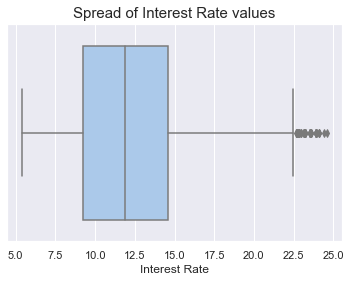

In [338]:
#Using Box Plot to plot int_rate column to visualise Outliers
sns.boxplot(loan["int_rate"],palette="pastel")
plt.title("Spread of Interest Rate values", fontsize = 15)
plt.xlabel("Interest Rate")
plt.show()
# As there are no significant outliers we can assume int_rate column is good to use

3. Plotting the annual_inc column for Outliers

In [339]:
#Describing the annual_inc column
loan["annual_inc"].describe()

count     39717.0000
mean      68968.9264
std       63793.7658
min        4000.0000
25%       40404.0000
50%       59000.0000
75%       82300.0000
max     6000000.0000
Name: annual_inc, dtype: float64

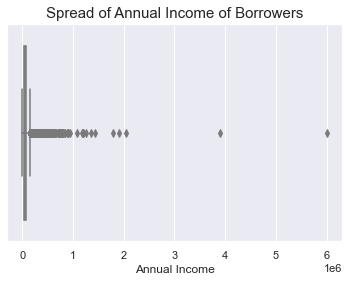

In [340]:
#Using Box Plot to plot annual_inc column to visualise Outliers
sns.boxplot(loan["annual_inc"],palette="pastel")
plt.title("Spread of Annual Income of Borrowers", fontsize = 15)
plt.xlabel("Annual Income")
plt.show()

In [341]:
#As the max value is far located from Mean as well as 75% values, This means the annual_inc has Outlier
#Checking the values from 75% to 100% for better visualization of the spread of data

loan_annual_inc_quantile = loan.annual_inc.quantile([0.75, 0.80, 0.85, 0.90, 0.95, 0.96, 0.97, 0.98, 0.99])
loan_annual_inc_quantile

0.7500    82300.0000
0.8000    90000.0000
0.8500   100000.0000
0.9000   116000.0000
0.9500   142000.0000
0.9600   150000.0000
0.9700   165757.9200
0.9800   187000.0000
0.9900   234999.3600
Name: annual_inc, dtype: float64

In [342]:
#Based on the above data we can safely remove the 95% data 
loan = loan[loan.annual_inc < loan.annual_inc.quantile(0.95)]

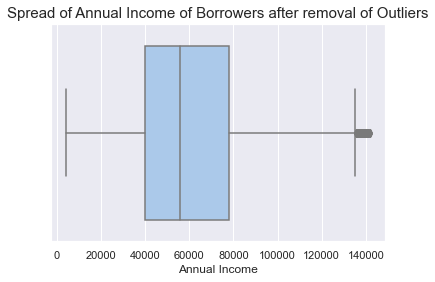

In [343]:
#Using Box Plot to plot annual_inc column to visualise Outliers
sns.boxplot(loan["annual_inc"],palette="pastel")
plt.title("Spread of Annual Income of Borrowers after removal of Outliers", fontsize = 15)
plt.xlabel("Annual Income")
plt.show()
#Removed the Outliers from annual_inc column

4. Plotting the dti column for Outliers

In [344]:
#Describing the dti column
loan["dti"].describe()

count   37730.0000
mean       13.4911
std         6.6686
min         0.0000
25%         8.4000
50%        13.6300
75%        18.7600
max        29.9900
Name: dti, dtype: float64

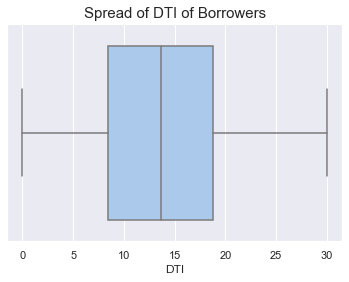

In [345]:
#Using Box Plot to plot dti column to visualise Outliers
sns.boxplot(loan["dti"], palette="pastel")
plt.title("Spread of DTI of Borrowers", fontsize = 15)
plt.xlabel("DTI")
plt.show()
#No Outliers Found

5. Plotting the loan_amnt for Outliers

In [346]:
#Describing the loan_amnt column
loan["loan_amnt"].describe()

count   37730.0000
mean    10845.2054
std      7153.9316
min       500.0000
25%      5075.0000
50%      9600.0000
75%     15000.0000
max     35000.0000
Name: loan_amnt, dtype: float64

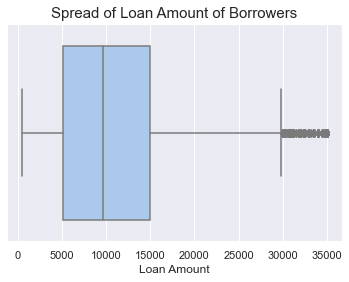

In [347]:
#Using Box Plot to plot loan_amnt column to visualise Outliers
sns.boxplot(loan["loan_amnt"], palette="pastel")
plt.title("Spread of Loan Amount of Borrowers", fontsize = 15)
plt.xlabel("Loan Amount")
plt.show()

In [348]:
#There are some Outliers in "loan_amnt" column, let's see those outliers
loan_loan_amnt_quantile = loan.loan_amnt.quantile([0.75, 0.80, 0.85, 0.90, 0.95, 0.96, 0.97, 0.98, 0.99])
loan_loan_amnt_quantile

0.7500   15000.0000
0.8000   16000.0000
0.8500   18500.0000
0.9000   20400.0000
0.9500   25000.0000
0.9600   25000.0000
0.9700   27000.0000
0.9800   30000.0000
0.9900   35000.0000
Name: loan_amnt, dtype: float64

Although there are Outliers but the data is distributed consistently, We can work with this data

6.Plotting the funded_amnt_inv for Outliers

In [349]:
#Describing the funded_amnt_inv column
loan["funded_amnt_inv"].describe()

count   37730.0000
mean    10059.2875
std      6833.5898
min         0.0000
25%      5000.0000
50%      8500.0000
75%     13952.7653
max     35000.0000
Name: funded_amnt_inv, dtype: float64

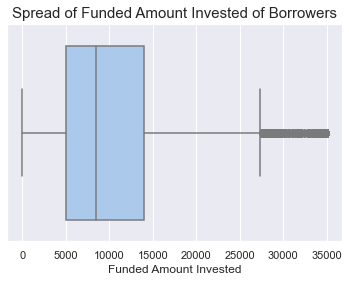

In [350]:
#Using Box Plot to plot funded_amnt_inv column to visualise Outliers
sns.boxplot(loan["funded_amnt_inv"], palette="pastel")
plt.title("Spread of Funded Amount Invested of Borrowers", fontsize = 15)
plt.xlabel("Funded Amount Invested")
plt.show()

In [351]:
#There are some Outliers in "funded_amnt_inv" column, let's see those outliers
loan_funded_amnt_inv_quantile = loan.funded_amnt_inv.quantile([0.75, 0.80, 0.85, 0.90, 0.95, 0.96, 0.97, 0.98, 0.99])
loan_funded_amnt_inv_quantile

0.7500   13952.7653
0.8000   15000.0000
0.8500   16926.9045
0.9000   19925.0000
0.9500   24000.0000
0.9600   24783.7674
0.9700   25000.0000
0.9800   28121.0000
0.9900   33093.0212
Name: funded_amnt_inv, dtype: float64

#### Note :- Excluding the Current Loans from loan_status columns because we don't have clear idea about the nature of Current Loans

In [352]:
#Removing the rows where loan_status is Current
loan = loan[~(loan["loan_status"] == "Current")]

Although there are Outliers but the data is distributed consistently, We can work with this data

# Data Visualisation

- ## Univariate Analysis
    - Unordered Categorical Variables :-
        - loan_status
        - home_ownership
        - purpose
        - verification_status
    - Ordered Categorical Variables :- 
        - grade
        - sub_grade
        - term
        - emp_length
        - Derieved Columns - Month and Year
        
    - Quantitative Variables :-
        - Loan Amount
        - Funded Amount Inv
        - Interest Rate
        - Annual Income
        - DTI

#### 1. Performing Univariate Analysis on loan_status
    - As loan_status is an unordered categorical variable we can use CountPlot to plot this catergorical variable

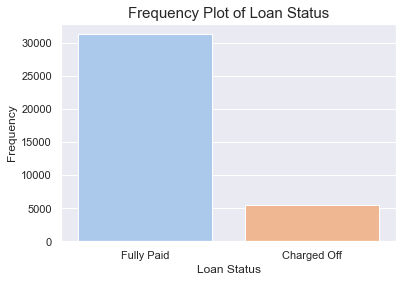

In [353]:
sns.countplot(x = loan.loan_status, palette="pastel")
plt.title("Frequency Plot of Loan Status", fontsize = 15)
plt.xlabel("Loan Status")
plt.ylabel("Frequency")
plt.show()

#### 2. Performing Univariate Analysis on home_ownership
- As home_ownership is an unordered categorical variable we can use CountPlot to plot this catergorical variable
- This plot has the combination of Charged Off, Fully Paid, Current loan statuses

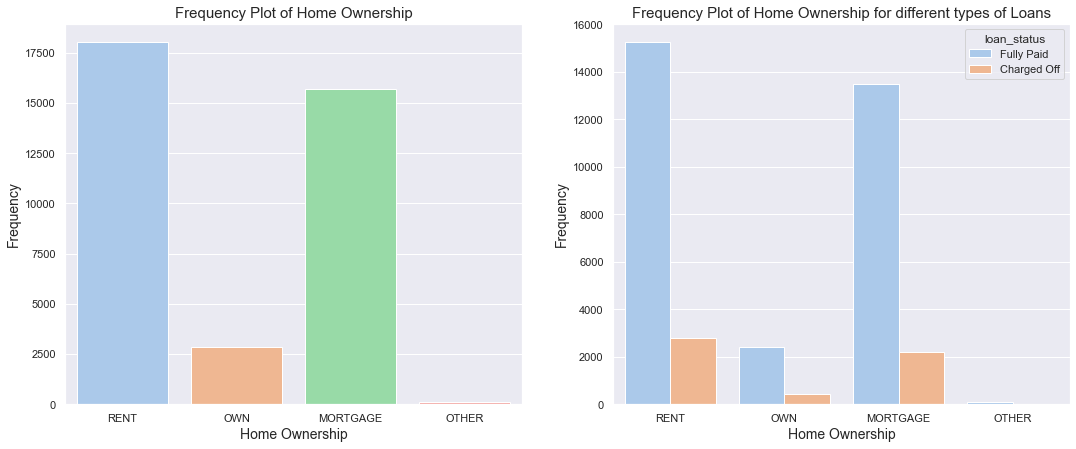

In [354]:
fig, ax = plt.subplots(1,2,figsize=(18, 7))


sns.countplot(x='home_ownership', data=loan, ax=ax[0], palette="pastel")
ax[0].set_title("Frequency Plot of Home Ownership", fontsize = 15)
ax[0].set_xlabel('Home Ownership',fontsize=14)
ax[0].set_ylabel('Frequency',fontsize=14)


sns.countplot(x='home_ownership', data=loan, ax=ax[1], hue="loan_status",palette="pastel")
ax[1].set_title('Frequency Plot of Home Ownership for different types of Loans',fontsize=15)
ax[1].set_xlabel('Home Ownership',fontsize=14)
ax[1].set_ylabel('Frequency',fontsize=14)
plt.show()



Initial Univariate Analysis

From the above visualizations,The Home Ownership values - RENT & MORTAGE have more Charged Off Loans
- RENT
- MORTAGE

#### 3. Performing Univariate Analysis on purpose

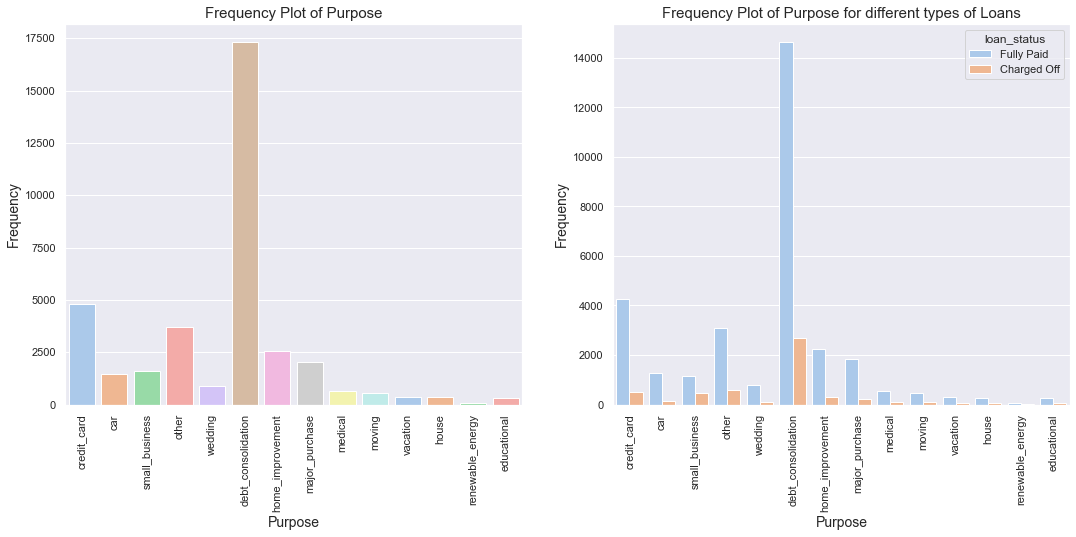

In [355]:
#Count Plot for the purpose data
fig, ax = plt.subplots(1,2,figsize=(18, 7))


sns.countplot(x='purpose', data=loan, ax=ax[0],palette="pastel")
ax[0].set_title("Frequency Plot of Purpose", fontsize = 15)
ax[0].set_xlabel('Purpose',fontsize=14)
ax[0].set_ylabel('Frequency',fontsize=14)
ax[0].tick_params(axis='x', labelrotation = 90)

sns.countplot(x='purpose', data=loan, ax=ax[1], hue="loan_status", palette="pastel")
ax[1].set_title('Frequency Plot of Purpose for different types of Loans',fontsize=15)
ax[1].set_xlabel('Purpose',fontsize=14)
ax[1].set_ylabel('Frequency',fontsize=14)
ax[1].tick_params(axis='x', labelrotation = 90)
plt.show()



Initial Univariate Analysis

From the above visualizations,The Purpose Values - debt_consolidation, credit_card, small_business, other have more Charged Off Loans.
- debt_consolidation
- credit_card
- small_business
- other

#### 4. Performing Univariate Analysis on verification_status

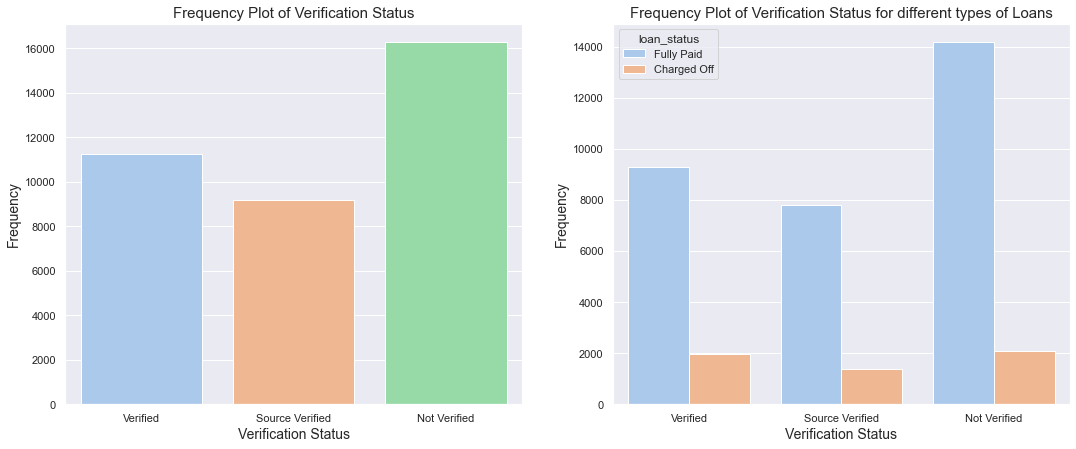

In [356]:
#Count Plot for the purpose data
fig, ax = plt.subplots(1,2,figsize=(18, 7))


sns.countplot(x='verification_status', data=loan, ax=ax[0], palette="pastel")
ax[0].set_title("Frequency Plot of Verification Status", fontsize = 15)
ax[0].set_xlabel('Verification Status',fontsize=14)
ax[0].set_ylabel('Frequency',fontsize=14)


sns.countplot(x='verification_status', data=loan, ax=ax[1], hue="loan_status", palette="pastel")
ax[1].set_title('Frequency Plot of Verification Status for different types of Loans',fontsize=15)
ax[1].set_xlabel('Verification Status',fontsize=14)
ax[1].set_ylabel('Frequency',fontsize=14)

plt.show()



Initial Univariate Analysis

From the above visualizations,The Verification Status Values - Not Verified, Verified have more Charged Off Loans.
- Not Verified
- Verified

#### 5. Performing Univariate Analysis on grade and sub_grade

#### Grade

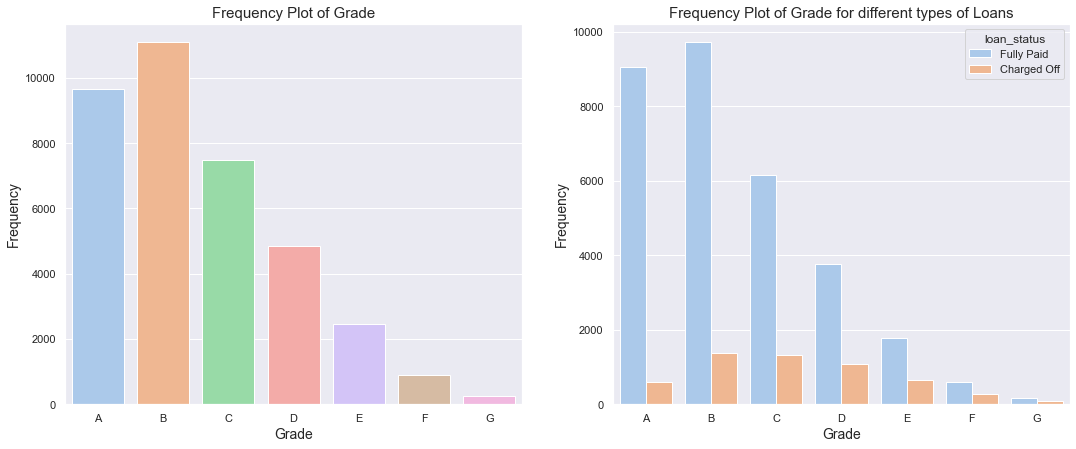

In [357]:
#Count Plot for the grade data
#Count Plot for the grade data
fig, ax = plt.subplots(1,2,figsize=(18, 7))

sns.countplot(x='grade', data=loan, ax=ax[0], order=['A', 'B', 'C', 'D', 'E', 'F', 'G'], palette="pastel")
ax[0].set_title("Frequency Plot of Grade", fontsize = 15)
ax[0].set_xlabel('Grade',fontsize=14)
ax[0].set_ylabel('Frequency',fontsize=14)
ax[0].tick_params(axis='x')

sns.countplot(x='grade', data=loan, ax=ax[1], hue="loan_status", order=['A', 'B', 'C', 'D', 'E', 'F', 'G'], palette="pastel")
ax[1].set_title('Frequency Plot of Grade for different types of Loans',fontsize=15)
ax[1].set_xlabel('Grade',fontsize=14)
ax[1].set_ylabel('Frequency',fontsize=14)
ax[1].tick_params(axis='x')

plt.show()


Note:- For grade there is an another similar column called sub_grade that provides much more insights for grade column

#### Sub Grade

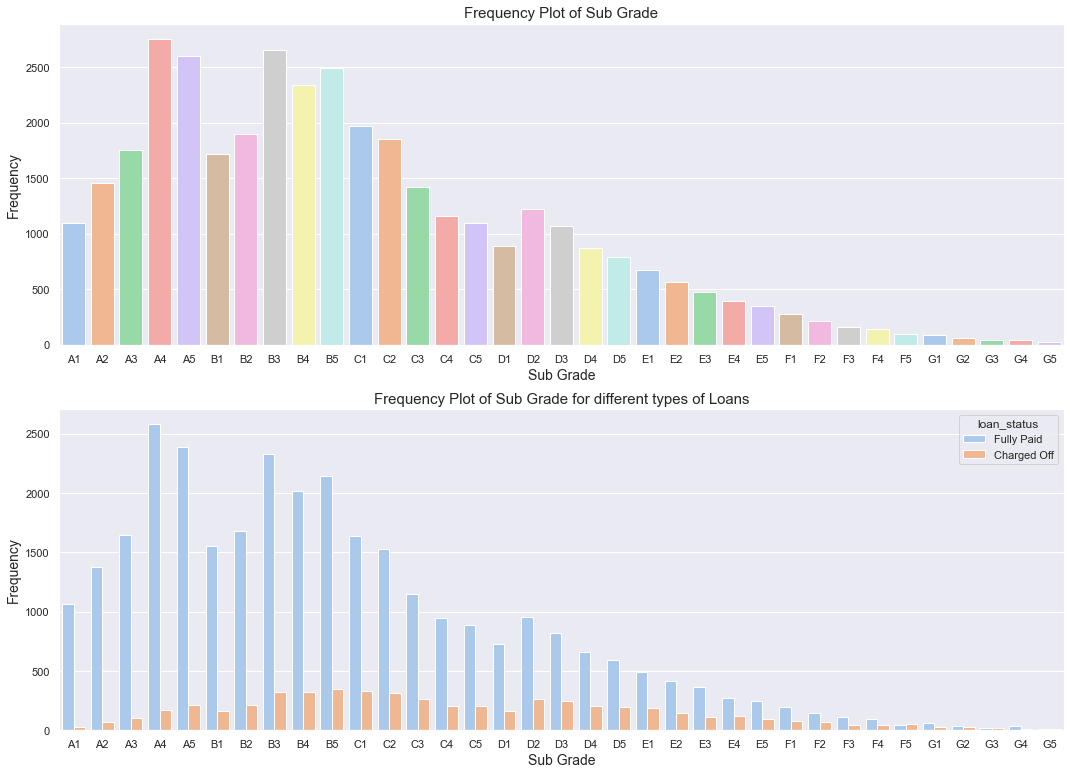

In [358]:

fig, ax = plt.subplots(2,1,figsize=(18, 13))

sns.countplot(x='sub_grade', data=loan, ax=ax[0], order=loan['sub_grade'].value_counts().sort_index().index, palette="pastel")
ax[0].set_title("Frequency Plot of Sub Grade", fontsize = 15)
ax[0].set_xlabel('Sub Grade',fontsize=14)
ax[0].set_ylabel('Frequency',fontsize=14)
ax[0].tick_params(axis='x')

sns.countplot(x='sub_grade', data=loan, ax=ax[1], hue="loan_status", order = loan['sub_grade'].value_counts().sort_index().index, palette="pastel")
ax[1].set_title('Frequency Plot of Sub Grade for different types of Loans',fontsize=15)
ax[1].set_xlabel('Sub Grade',fontsize=14)
ax[1].set_ylabel('Frequency',fontsize=14)
ax[1].tick_params(axis='x')

plt.show()


Initial Univariate Analysis

From the above visualizations,The Grades B, C and D, most of the Charged off applicants belong to Sub Grades:
   - Grade B -> B3, B5, B4
   - Grade C -> C3, C4, C5
   - Grade D -> D3, D4, D5

#### 6. Performing Univariate Analysis on term

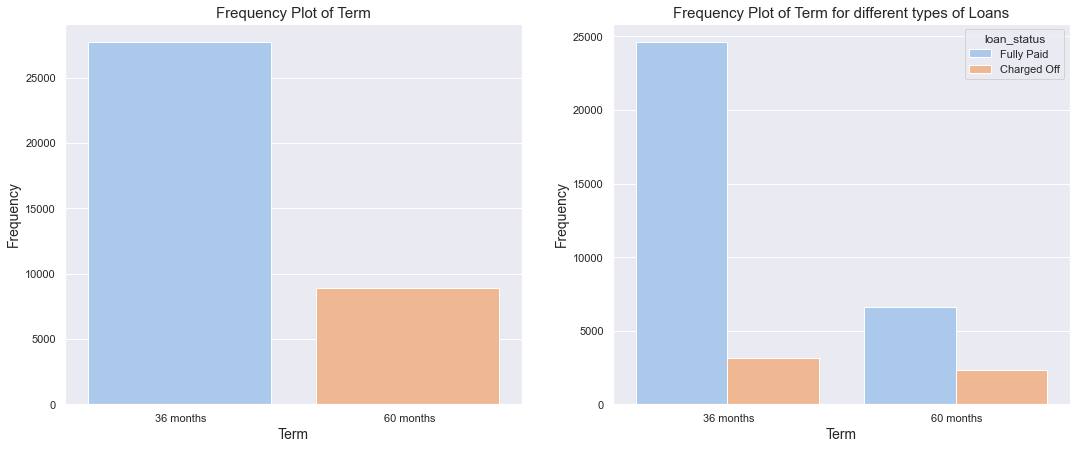

In [359]:
#Count Plot for the term data
fig, ax = plt.subplots(1,2,figsize=(18, 7))


sns.countplot(x='term', data=loan, ax=ax[0], palette="pastel")
ax[0].set_title("Frequency Plot of Term", fontsize = 15)
ax[0].set_xlabel('Term',fontsize=14)
ax[0].set_ylabel('Frequency',fontsize=14)


sns.countplot(x='term', data=loan, ax=ax[1], hue="loan_status", palette="pastel")
ax[1].set_title('Frequency Plot of Term for different types of Loans',fontsize=15)
ax[1].set_xlabel('Term',fontsize=14)
ax[1].set_ylabel('Frequency',fontsize=14)


plt.show()

Initial Univariate Analysis

From the above visualizations,The term 36 Months have more Charged Off Loans
- 36 months

#### 7. Performing Univariate Analysis on emp_length

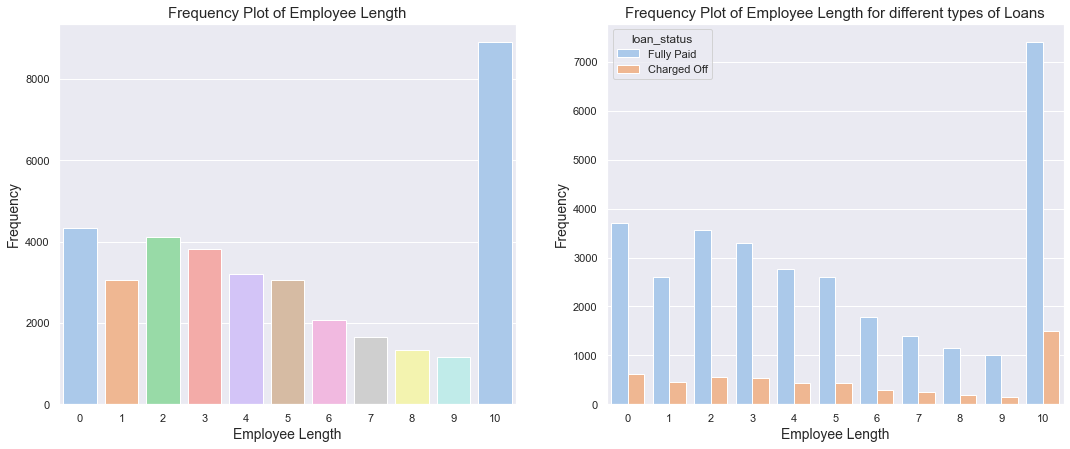

In [360]:
#Count Plot for the emp_length data
fig, ax = plt.subplots(1,2,figsize=(18, 7))


sns.countplot(x='emp_length', data=loan, ax=ax[0], palette="pastel")
ax[0].set_title("Frequency Plot of Employee Length", fontsize = 15)
ax[0].set_xlabel('Employee Length',fontsize=14)
ax[0].set_ylabel('Frequency',fontsize=14)


sns.countplot(x='emp_length', data=loan, ax=ax[1], hue="loan_status", palette="pastel")
ax[1].set_title('Frequency Plot of Employee Length for different types of Loans',fontsize=15)
ax[1].set_xlabel('Employee Length',fontsize=14)
ax[1].set_ylabel('Frequency',fontsize=14)

plt.show()

Initial Univariate Analysis

From the above visualizations, The Employee Length 10 years & 0 years have major number of Charged Off loans.

- 10+ Years
- <1 Year

#### 8. Univariate Analysis on Funded Amount Inv

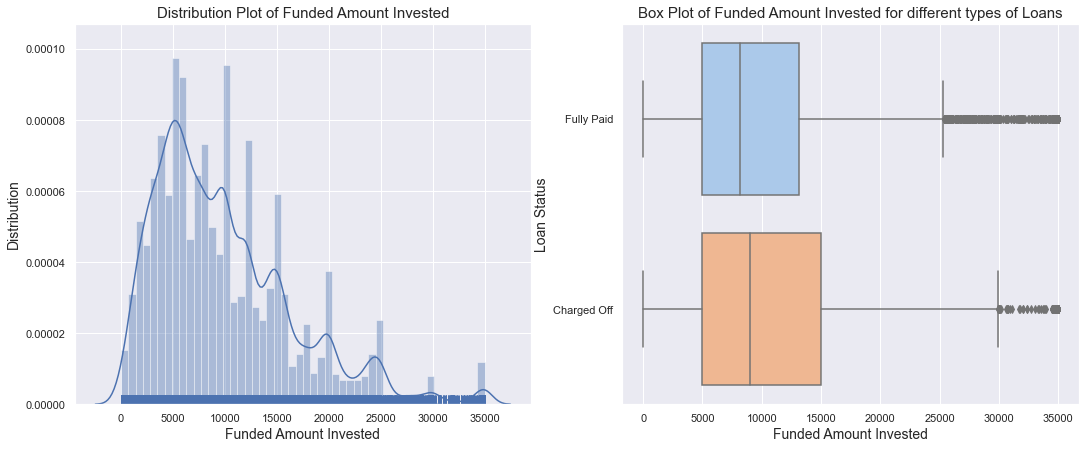

In [361]:
fig, ax = plt.subplots(1,2,figsize=(18, 7))


sns.distplot(loan.funded_amnt_inv, rug=True, ax=ax[0])
ax[0].set_title("Distribution Plot of Funded Amount Invested", fontsize = 15)
ax[0].set_xlabel('Funded Amount Invested',fontsize=14)
ax[0].set_ylabel('Distribution',fontsize=14)


sns.boxplot(x='funded_amnt_inv', data=loan, ax=ax[1], y="loan_status", palette="pastel")
ax[1].set_title('Box Plot of Funded Amount Invested for different types of Loans',fontsize=15)
ax[1].set_xlabel('Funded Amount Invested',fontsize=14)
ax[1].set_ylabel('Loan Status',fontsize=14)

plt.show()


Initial Univariate Analysis

From the above visualizations, The Charged Off Applicants for Funded Amount Invested has a central tendency of amount 10620 with minimum 25th percentile values as 4995, maximum 75th percentile values as 14975

#### 10. Univariate Analysis on Interest Rate

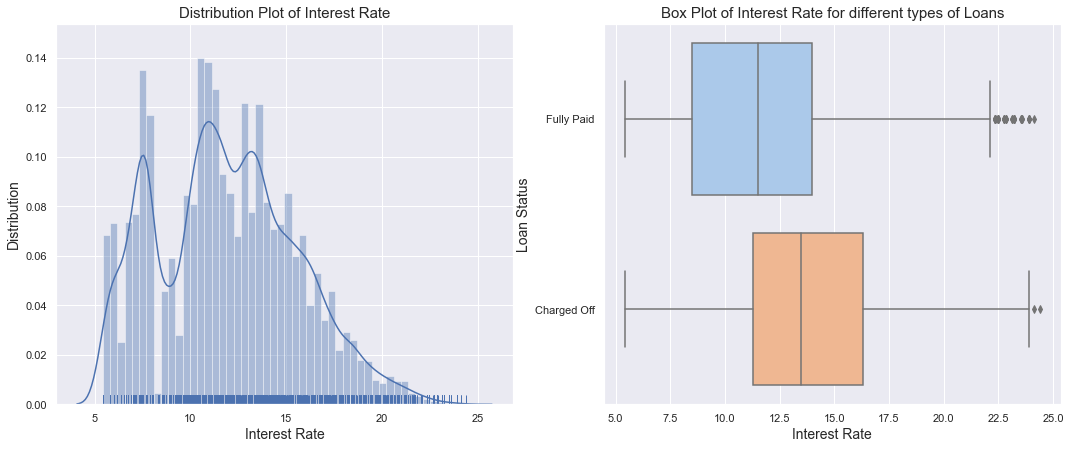

In [362]:
fig, ax = plt.subplots(1,2,figsize=(18, 7))


sns.distplot(loan.int_rate, rug=True, ax=ax[0])
ax[0].set_title("Distribution Plot of Interest Rate", fontsize = 15)
ax[0].set_xlabel('Interest Rate',fontsize=14)
ax[0].set_ylabel('Distribution',fontsize=14)

sns.boxplot(x='int_rate', data=loan, ax=ax[1], y="loan_status", palette="pastel")
ax[1].set_title('Box Plot of Interest Rate for different types of Loans',fontsize=15)
ax[1].set_xlabel('Interest Rate',fontsize=14)
ax[1].set_ylabel('Loan Status',fontsize=14)

plt.show()

Initial Univariate Analysis

From the above visualizations, The Charged Off Applicants for Interest Rate has a central tendency of Interest Rate 13.49 with minimum 25th percentile value as 11.26, maximum 75th percentile value as 16.32

#### 11. Univariate Analysis on Annual Income

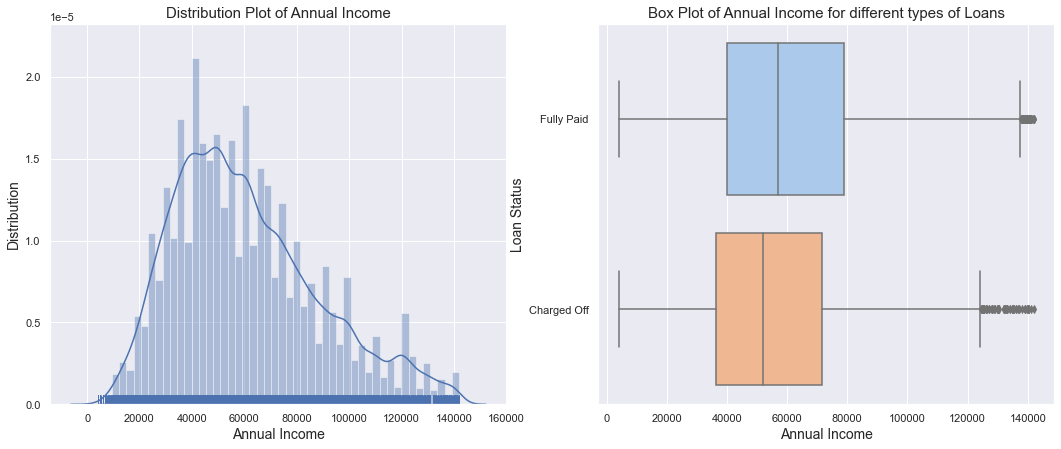

In [363]:
fig, ax = plt.subplots(1,2,figsize=(18, 7))


sns.distplot(loan.annual_inc, rug=True, ax=ax[0])
ax[0].set_title("Distribution Plot of Annual Income", fontsize = 15)
ax[0].set_xlabel('Annual Income',fontsize=14)
ax[0].set_ylabel('Distribution',fontsize=14)


sns.boxplot(x='annual_inc', data=loan, ax=ax[1], y="loan_status", palette="pastel")
ax[1].set_title('Box Plot of Annual Income for different types of Loans',fontsize=15)
ax[1].set_xlabel('Annual Income',fontsize=14)
ax[1].set_ylabel('Loan Status',fontsize=14)

plt.show()

Initial Univariate Analysis

From the above visualizations, The Charged Off Applicants for Annual Income has a central tendency of Annual Income 51996 with minimum 25th percentile value as 36299, maximum 75th percentile value as 71525

#### 12. Univariate Analysis on DTI

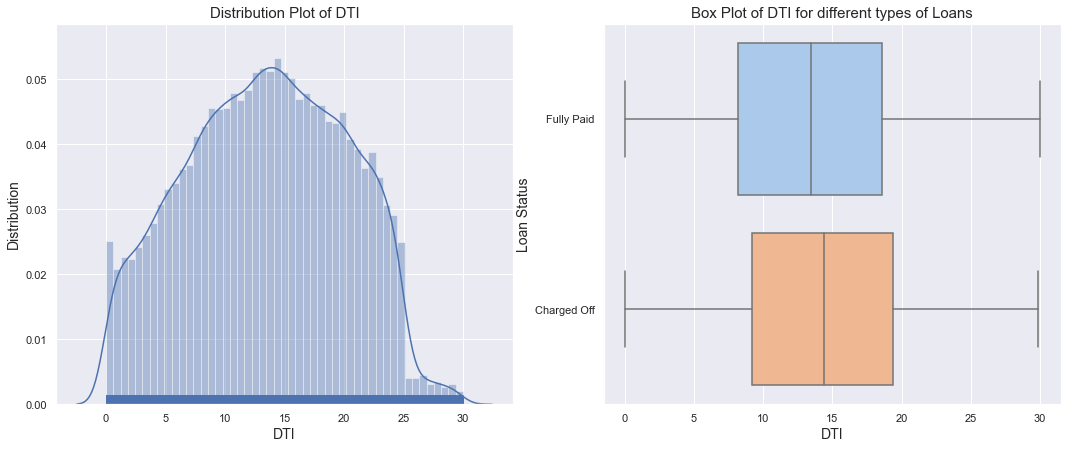

In [364]:
fig, ax = plt.subplots(1,2,figsize=(18, 7))


sns.distplot(loan.dti, rug=True, ax=ax[0])
ax[0].set_title("Distribution Plot of DTI", fontsize = 15)
ax[0].set_xlabel('DTI',fontsize=14)
ax[0].set_ylabel('Distribution',fontsize=14)


sns.boxplot(x='dti', data=loan, ax=ax[1], y="loan_status", palette="pastel")
ax[1].set_title('Box Plot of DTI for different types of Loans',fontsize=15)
ax[1].set_xlabel('DTI',fontsize=14)
ax[1].set_ylabel('Loan Status',fontsize=14)

plt.show()

Initial Univariate Analysis

From the above visualizations, The Charged Off Applicants for DTI has a central tendency of DTI 14.4% with minimum 25th percentile value as 9.18%, maximum 75th percentile value as 19.4%

- # Bivariate Analysis
    - Funded Amount Invested vs Loan Status
    - Funded Amount Invested vs Term
    - Funded Amount Invested vs Interest Rate
    - Funded Amount Invested vs Annual Income
    - Funded Amount Invested vs Purpose
    - Funded Amount Invested vs Employee Length
    - Funded Amount Invested vs Home Ownership
    - Funded Amount Invested vs Month and Year issued
    - Funded Amount Invested vs Grade
    - Funded Amount Invested vs Verification Status
    - Funded Amount Invested vs DTI
    - Grade vs Interest Rate
    - Annual Income vs Home Ownership
    - Annual Income vs Interest Rate
    - Home Ownership vs Purpose
    - Annual Income vs Purpose

In [365]:
#creating bins for int_rate,dti,annual_inc, loan_amnt
loan['int_rate_groups'] = pd.cut(loan['int_rate'], bins=4,precision =0,labels=['5%-10%','10%-15%','15%-20%','20%-25%'])
loan['dti_groups'] = pd.cut(loan['dti'],bins = 6,precision =0,labels=['0-5','5-10','10-15','15-20', '20-25','25-30'])
loan['annual_inc_groups'] = pd.cut(loan['annual_inc'], bins=8,precision =0,labels =['0k-20k','20k-40k','40k-60k','60k-80k','80k-100k', '100k-120k','120k-140k','140k-150k'])
loan['loan_amnt_groups'] = pd.cut(loan['loan_amnt'], bins=7,precision =0,labels=['0-5k','5k-10k','10k-15k','15k-20k','20k-25k','25k-30k','30k-35k'])
loan['funded_amnt_inv_groups'] = pd.cut(loan['funded_amnt_inv'], bins=7,precision =0,labels=['0-5k','5k-10k','10k-15k','15k-20k','20k-25k','25k-30k','30k-35k'])


#### 1. Funded Amount Invested vs Loan Status

                 count       mean       std      min       25%        50%  \
loan_status                                                                 
Charged Off  5420.0000 11484.4004 7573.5362 900.0000 5400.0000 10000.0000   
Fully Paid  31256.0000 10255.1718 6640.1551 500.0000 5000.0000  9000.0000   

                   75%        max  
loan_status                        
Charged Off 15600.0000 35000.0000  
Fully Paid  14000.0000 35000.0000  


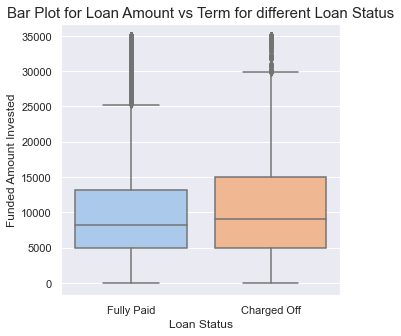

In [366]:
#Describing the Funded Amount grouped by Loan Status
print(loan.groupby(by = 'loan_status').funded_amnt.describe().sort_index())

plt.figure(figsize=(5, 5))

sns.boxplot(x = "loan_status",y = 'funded_amnt_inv', data = loan, palette="pastel")
plt.title("Bar Plot for Loan Amount vs Term for different Loan Status", fontsize=15)
plt.xlabel("Loan Status")
plt.ylabel("Funded Amount Invested")
plt.show()

As per above visualisation, The Charged Off applicants has a central tendency of Funded Amount Invested as 10,000. The Minimum 25th Percentile is 5420, and maximum 75th Percentile is 15600

#### 2.1. Funded Amount Invested vs Term (with frequency of loan statuses in Term Column)

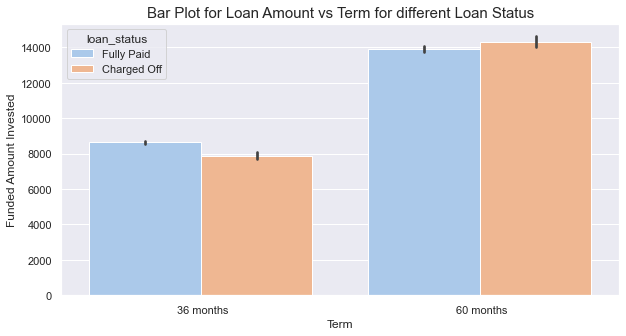

In [367]:
plt.figure(figsize=(10, 5))

sns.barplot(x = "term",y = 'funded_amnt_inv', data = loan, hue = "loan_status", palette="pastel")
plt.title("Bar Plot for Loan Amount vs Term for different Loan Status", fontsize=15)
plt.xlabel("Term")
plt.ylabel("Funded Amount Invested")
plt.show()

### Note :- As we can see there are no significant insights that can be drawn from "Loan Amount vs Term" because  we are plotting Charged Off and Fully Paid loan statuses in a single chart but the frequency of Charged Off and Fully Paid loan statuses is significantly different. To tackle this we are going to use "Pivot Tables" and some calculations are done on these Pivot Table that reflects the percentage of Charged Off and Fully Paid loan statuses for a particular column. This helps us to visualize the data in depth

#### 2.2. Funded Amount Invested vs Term (with Percentages of loan statuses in Term Column)

In [368]:
# Creating a Pivot Table
loan_pivot_term = loan.pivot_table(values = 'funded_amnt_inv',
                      index = 'term',
                      columns = 'loan_status',
                      aggfunc = np.count_nonzero,
                      fill_value = 0,
                      margins = True,
                      margins_name = 'Total')

loan_pivot_term['Charged Off Percentage'] = 100*(round((loan_pivot_term['Charged Off']/loan_pivot_term['Total']), 6))

loan_pivot_term = loan_pivot_term.reset_index()
loan_pivot_term = loan_pivot_term[loan_pivot_term["term"] != "Total"]

loan_status        term  Charged Off  Fully Paid  Total  \
0             36 months         3089       24525  27614   
1             60 months         2304        6633   8937   

loan_status  Charged Off Percentage  
0                           11.1864  
1                           25.7805  


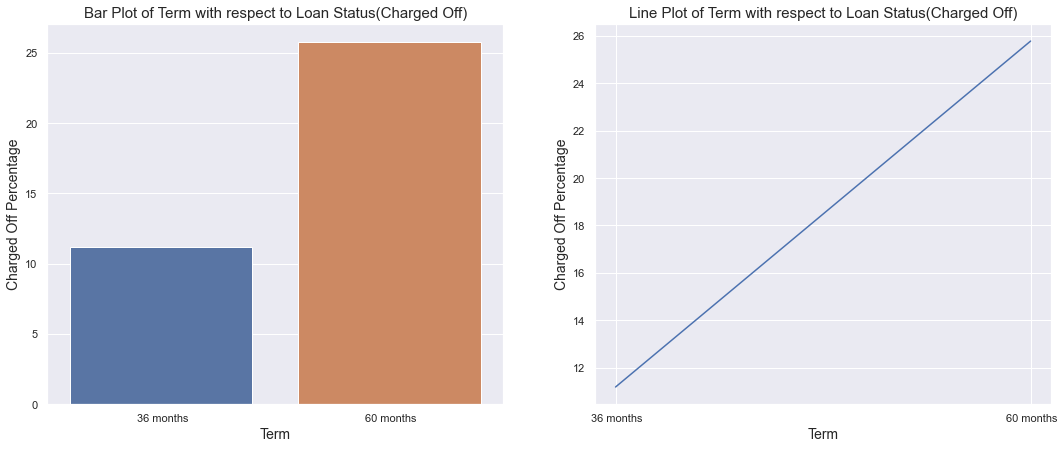

In [369]:
#Describing the Term column over Funded Amount Invested and Loan Status
print(loan_pivot_term.sort_index())

fig, ax = plt.subplots(1,2,figsize=(18, 7))

sns.barplot(x = loan_pivot_term.term, y = loan_pivot_term['Charged Off Percentage'], ax = ax[0])

ax[0].set_title("Bar Plot of Term with respect to Loan Status(Charged Off)", fontsize = 15)
ax[0].set_xlabel('Term',fontsize=14)
ax[0].set_ylabel('Charged Off Percentage',fontsize=14)


sns.lineplot(data = loan_pivot_term, x = "term", y = "Charged Off Percentage", ax = ax[1])
ax[1].set_title("Line Plot of Term with respect to Loan Status(Charged Off)", fontsize = 15)
ax[1].set_xlabel('Term',fontsize=14)
ax[1].set_ylabel('Charged Off Percentage',fontsize=14)


plt.show()


From the above visualisation, We can say that the Top Charged Off Percentage for Term is
- 60 months -> 25.7805 %. Out of 8937 people who borrowed the loan for term of 60, 2304 people were Charged Off

#### 3. Funded Amount Invested vs Interest Rate

In [370]:
# Creating a Pivot Table
loan_pivot_int_rate = loan.pivot_table(values = 'funded_amnt_inv',
                      index = 'int_rate_groups',
                      columns = 'loan_status',
                      aggfunc = np.count_nonzero,
                      fill_value = 0)

loan_pivot_int_rate['Total'] = loan_pivot_int_rate['Charged Off'] + loan_pivot_int_rate['Fully Paid']


loan_pivot_int_rate['Charged Off Percentage'] = 100*(round((loan_pivot_int_rate['Charged Off']/loan_pivot_int_rate['Total']), 6))

loan_pivot_int_rate = loan_pivot_int_rate.reset_index()


loan_status int_rate_groups  Charged Off  Fully Paid  Total  \
0                    5%-10%          813       11029  11842   
1                   10%-15%         2539       14347  16886   
2                   15%-20%         1701        5251   6952   
3                   20%-25%          340         531    871   

loan_status  Charged Off Percentage  
0                            6.8654  
1                           15.0361  
2                           24.4678  
3                           39.0356  


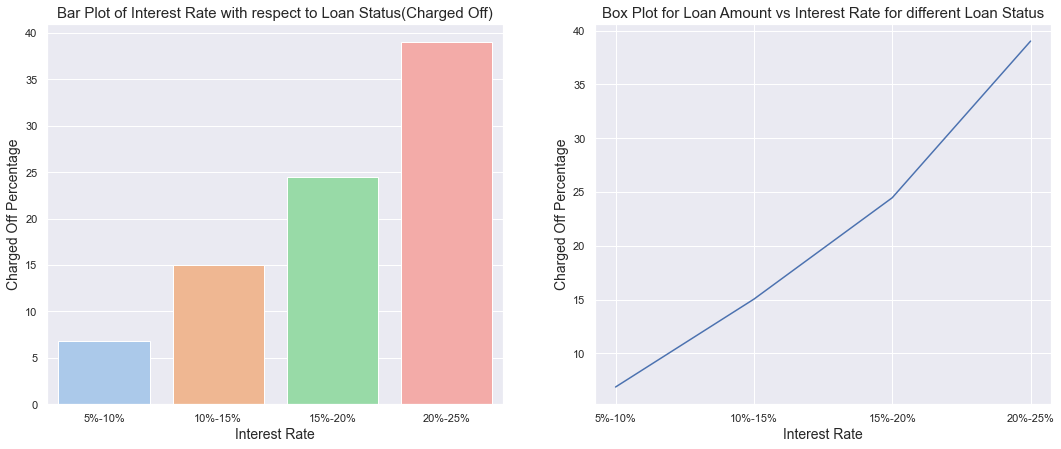

In [371]:
#Describing the Interest Rate over Funded Amount Invested and Loan Status
print(loan_pivot_int_rate.sort_index())

fig, ax = plt.subplots(1,2,figsize=(18, 7))

sns.barplot(x = "int_rate_groups",y = 'Charged Off Percentage', data = loan_pivot_int_rate, palette="pastel", ax = ax[0])
ax[0].set_title("Bar Plot of Interest Rate with respect to Loan Status(Charged Off)", fontsize = 15)
ax[0].set_xlabel('Interest Rate',fontsize=14)
ax[0].set_ylabel('Charged Off Percentage',fontsize=14)

sns.lineplot(data = loan_pivot_int_rate, x = "int_rate_groups", y = "Charged Off Percentage", palette="pastel")

ax[1].set_title("Box Plot for Loan Amount vs Interest Rate for different Loan Status", fontsize=15)
ax[1].set_xlabel("Interest Rate",fontsize=14)
ax[1].set_ylabel('Charged Off Percentage',fontsize=14)
plt.show()

From the above visualisation, We can say that the Top Charged Off Percentage for Interest Rate is
- 20-25% -> 39.03 %.
- 15-20% -> 24.46 %.

In [372]:
#Finding the Funded Amount Invested for 20-25% and 15-20% Interest Rates
loan_pivot_int_rate_funded = loan.pivot_table(values = 'funded_amnt_inv',
                      index = 'int_rate_groups',
                      columns = 'loan_status',
                      aggfunc = max,
                      fill_value = 0)


From the above visualisation, We can say that the Top Charged Off Percentage for Interest Rate is
- 20-25% -> 39.03 %.
- 15-20% -> 24.46 %.

It is suggested to not to give loans if the people have Funded amount Invested as 35000 and Interest Rate is above 15%

#### 4. Funded Amount Invested vs Annual Income

In [373]:
# Creating a Pivot Table
loan_pivot_annual_income = loan.pivot_table(values = 'funded_amnt_inv',
                      index = 'annual_inc_groups',
                      columns = 'loan_status',
                      aggfunc = np.count_nonzero,
                      fill_value = 0)

loan_pivot_annual_income['Total'] = loan_pivot_annual_income['Charged Off'] + loan_pivot_annual_income['Fully Paid']


loan_pivot_annual_income['Charged Off Percentage'] = 100*(round((loan_pivot_annual_income['Charged Off']/loan_pivot_annual_income['Total']), 6))

loan_pivot_annual_income = loan_pivot_annual_income.reset_index()


loan_status annual_inc_groups  Charged Off  Fully Paid  Total  \
0                      0k-20k          270        1085   1355   
1                     20k-40k         1235        5744   6979   
2                     40k-60k         1514        8276   9790   
3                     60k-80k         1096        6546   7642   
4                    80k-100k          670        4551   5221   
5                   100k-120k          290        2437   2727   
6                   120k-140k          198        1544   1742   
7                   140k-150k          120         975   1095   

loan_status  Charged Off Percentage  
0                           19.9262  
1                           17.6959  
2                           15.4648  
3                           14.3418  
4                           12.8328  
5                           10.6344  
6                           11.3662  
7                           10.9589  


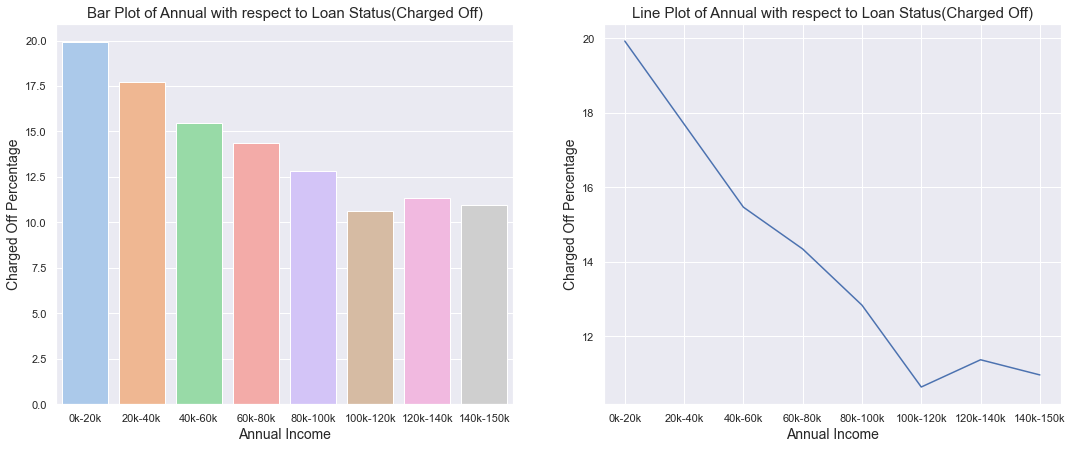

In [374]:
#Describing the Annual Income column over Funded Amount Invested and Loan Status
print(loan_pivot_annual_income.sort_index())

fig, ax = plt.subplots(1,2,figsize=(18, 7))

sns.barplot(x = "annual_inc_groups",y = 'Charged Off Percentage', data = loan_pivot_annual_income,  palette="pastel", ax=ax[0])
ax[0].set_title("Bar Plot of Annual with respect to Loan Status(Charged Off)", fontsize = 15)
ax[0].set_xlabel('Annual Income',fontsize=14)
ax[0].set_ylabel('Charged Off Percentage',fontsize=14)

sns.lineplot(data = loan_pivot_annual_income, x = "annual_inc_groups", y = "Charged Off Percentage", palette="pastel")

ax[1].set_title("Line Plot of Annual with respect to Loan Status(Charged Off)", fontsize=15)
ax[1].set_xlabel("Annual Income",fontsize=14)
ax[1].set_ylabel("Charged Off Percentage",fontsize=14)

plt.show()

From the above visualisation, We can say that the Top Charged Off Percentage for Annual Income is
- 0-20k -> 19.9262 %. 
- 20k-40k -> 17.6959 %.
- 40k-60k -> 15.4648 %.

#### 5. Funded Amount Invested vs Purpose

In [375]:
# Creating a Pivot Table
loan_pivot_purpose = loan.pivot_table(values = 'funded_amnt_inv',
                      index = 'purpose',
                      columns = 'loan_status',
                      aggfunc = np.count_nonzero,
                      fill_value = 0)

loan_pivot_purpose['Total'] = loan_pivot_purpose['Charged Off'] + loan_pivot_purpose['Fully Paid']


loan_pivot_purpose['Charged Off Percentage'] = 100*(round((loan_pivot_purpose['Charged Off']/loan_pivot_purpose['Total']), 6))

loan_pivot_purpose = loan_pivot_purpose.reset_index()


loan_status           purpose  Charged Off  Fully Paid  Total  \
11             small_business          454        1170   1624   
10           renewable_energy           18          76     94   
3                 educational           54         251    305   
8                      moving           90         457    547   
5                       house           55         281    336   

loan_status  Charged Off Percentage  
11                          27.9557  
10                          19.1489  
3                           17.7049  
8                           16.4534  
5                           16.3690  


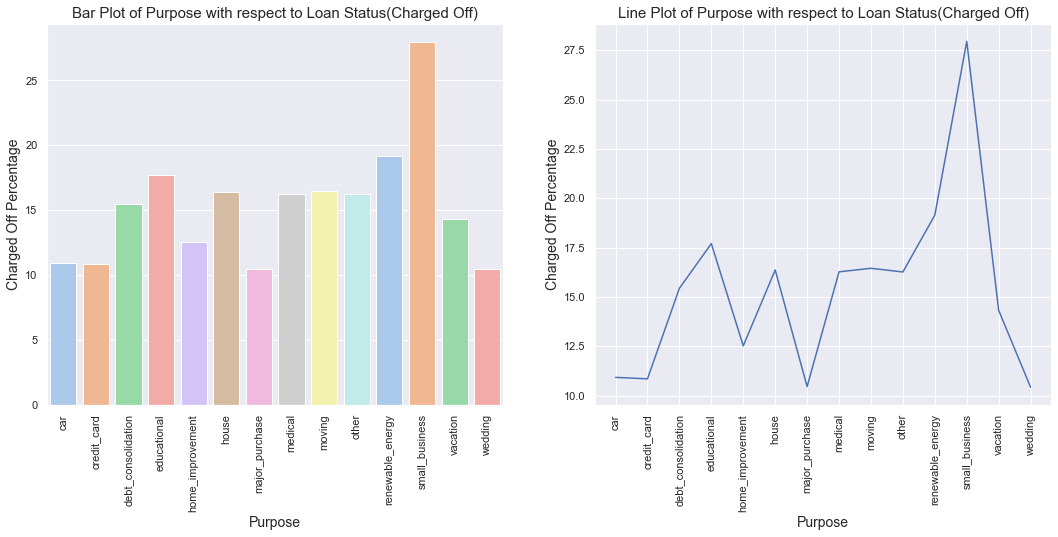

In [376]:
#Describing the Purpose over Funded Amount Invested and Loan Status
print(loan_pivot_purpose.sort_values("Charged Off Percentage", ascending=False).head())

fig, ax = plt.subplots(1,2,figsize=(18, 7))

sns.barplot(x = "purpose",y = 'Charged Off Percentage', data = loan_pivot_purpose,  palette="pastel", ax=ax[0])
ax[0].set_title("Bar Plot of Purpose with respect to Loan Status(Charged Off)", fontsize = 15)
ax[0].set_xlabel('Purpose',fontsize=14)
ax[0].set_ylabel('Charged Off Percentage',fontsize=14)
ax[0].tick_params(axis='x', labelrotation = 90)

sns.lineplot(data = loan_pivot_purpose, y = "Charged Off Percentage", x = "purpose", palette="pastel")

ax[1].set_title("Line Plot of Purpose with respect to Loan Status(Charged Off)", fontsize=15)
ax[1].set_xlabel("Purpose",fontsize=14)
ax[1].set_ylabel("Charged Off Percentage",fontsize=14)
ax[1].tick_params(axis='x', labelrotation = 90)

plt.show()


From the above visualisation, We can say that the Top Charged Off Percentage for Purpose is
- small_business -> 27.95 %.
- renewable_energy -> 19.14 %.
- educational -> 17.70 %.

#### 6. Funded Amount Invested vs Employee Experience

In [377]:
# Creating a Pivot Table
loan_pivot_experience = loan.pivot_table(values = 'funded_amnt_inv',
                      index = 'emp_length',
                      columns = 'loan_status',
                      aggfunc = np.count_nonzero,
                      fill_value = 0)

loan_pivot_experience['Total'] = loan_pivot_experience['Charged Off'] + loan_pivot_experience['Fully Paid']


loan_pivot_experience['Charged Off Percentage'] = 100*(round((loan_pivot_experience['Charged Off']/loan_pivot_experience['Total']), 6))

loan_pivot_experience = loan_pivot_experience.reset_index()


loan_status  emp_length  Charged Off  Fully Paid  Total  \
10                   10         1492        7396   8888   
7                     7          250        1386   1636   
1                     1          443        2582   3025   
8                     8          194        1140   1334   
5                     5          438        2602   3040   

loan_status  Charged Off Percentage  
10                          16.7867  
7                           15.2812  
1                           14.6446  
8                           14.5427  
5                           14.4079  


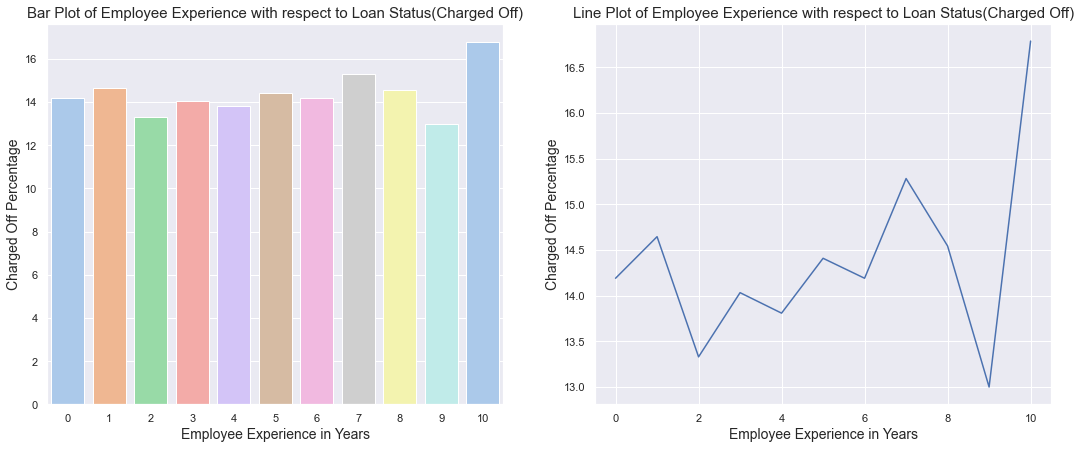

In [378]:
#Describing the Employee Length over Funded Amount Invested and Loan Status
print(loan_pivot_experience.sort_values("Charged Off Percentage", ascending=False).head())

fig, ax = plt.subplots(1,2,figsize=(18, 7))

sns.barplot(x = "emp_length",y = 'Charged Off Percentage', data = loan_pivot_experience, palette="pastel", ax=ax[0])
ax[0].set_title("Bar Plot of Employee Experience with respect to Loan Status(Charged Off)", fontsize = 15)
ax[0].set_xlabel('Employee Experience in Years',fontsize=14)
ax[0].set_ylabel('Charged Off Percentage',fontsize=14)


sns.lineplot(data = loan_pivot_experience, y = "Charged Off Percentage", x = "emp_length",palette="pastel")

ax[1].set_title("Line Plot of Employee Experience with respect to Loan Status(Charged Off)", fontsize=15)
ax[1].set_xlabel("Employee Experience in Years",fontsize=14)
ax[1].set_ylabel("Charged Off Percentage",fontsize=14)

plt.show()


From the above visualisation, We can say that the Top Charged Off Percentage for Employee Length is
- 10 Years (> 10 Years) -> 16.78 %.
- 7 Years -> 15.28 %.
- 1 Year -> 14.64 %.

Note :- The Experience 10 Years is combination of all Years above 10. i.e 10,11,12,13,... SO, it can be quite high when compared to other Experiences.

#### 7. Funded Amount Invested vs Home Ownership

In [379]:
# Creating a Pivot Table
loan_pivot_home = loan.pivot_table(values = 'funded_amnt_inv',
                      index = 'home_ownership',
                      columns = 'loan_status',
                      aggfunc = np.count_nonzero,
                      fill_value = 0)

loan_pivot_home['Total'] = loan_pivot_home['Charged Off'] + loan_pivot_home['Fully Paid']


loan_pivot_home['Charged Off Percentage'] = 100*(round((loan_pivot_home['Charged Off']/loan_pivot_home['Total']), 6))

loan_pivot_home = loan_pivot_home.reset_index()


loan_status home_ownership  Charged Off  Fully Paid  Total  \
1                    OTHER           16          77     93   
3                     RENT         2757       15201  17958   
2                      OWN          433        2412   2845   
0                 MORTGAGE         2187       13468  15655   

loan_status  Charged Off Percentage  
1                           17.2043  
3                           15.3525  
2                           15.2197  
0                           13.9700  


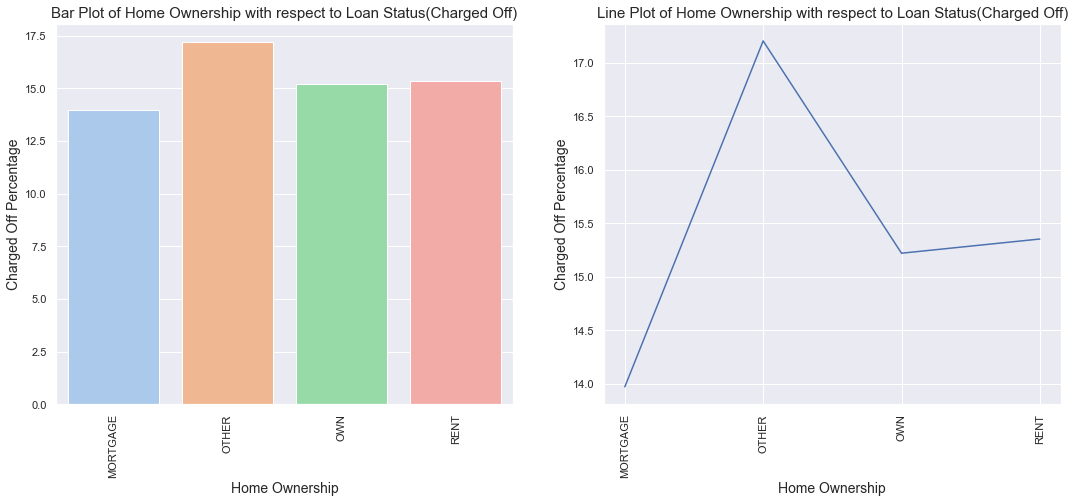

In [380]:
#Describing the Home Ownership over Funded Amount Invested and Loan Status
print(loan_pivot_home.sort_values("Charged Off Percentage", ascending=False).head())

fig, ax = plt.subplots(1,2,figsize=(18, 7))

sns.barplot(x = "home_ownership",y = 'Charged Off Percentage', data = loan_pivot_home, palette="pastel", ax = ax[0])
ax[0].set_title("Bar Plot of Home Ownership with respect to Loan Status(Charged Off)", fontsize = 15)
ax[0].set_xlabel('Home Ownership',fontsize=14)
ax[0].set_ylabel('Charged Off Percentage',fontsize=14)
ax[0].tick_params(axis='x', labelrotation = 90)

sns.lineplot(data = loan_pivot_home, y = "Charged Off Percentage", x = "home_ownership", palette="pastel")

ax[1].set_title("Line Plot of Home Ownership with respect to Loan Status(Charged Off)", fontsize=15)
ax[1].set_xlabel("Home Ownership",fontsize=14)
ax[1].set_ylabel("Charged Off Percentage",fontsize=14)
ax[1].tick_params(axis='x', labelrotation = 90)

plt.show()


From the above visualisation, We can say that the Top Charged Off Percentage for Home Ownership is
- OTHER -> 17.2 %.
- RENT -> 15.35 %.
- OWN -> 15.21 %.



#### 8. Funded Amount Invested vs Month and Year Issued

In [381]:
# Creating a Pivot Table
loan_pivot_month = loan.pivot_table(values = 'funded_amnt_inv',
                      index = 'issued_Month',
                      columns = 'loan_status',
                      aggfunc = np.count_nonzero,
                      fill_value = 0)

loan_pivot_month['Total'] = loan_pivot_month['Charged Off'] + loan_pivot_month['Fully Paid']


loan_pivot_month['Charged Off Percentage'] = 100*(round((loan_pivot_month['Charged Off']/loan_pivot_month['Total']), 6))

loan_pivot_month = loan_pivot_month.reset_index()


loan_status issued_Month  Charged Off  Fully Paid  Total  \
2                    Dec          656        3363   4019   
11                   Sep          533        2753   3286   
8                    May          448        2316   2764   
10                   Oct          546        2980   3526   
6                    Jun          460        2531   2991   

loan_status  Charged Off Percentage  
2                           16.3225  
11                          16.2203  
8                           16.2084  
10                          15.4850  
6                           15.3795  


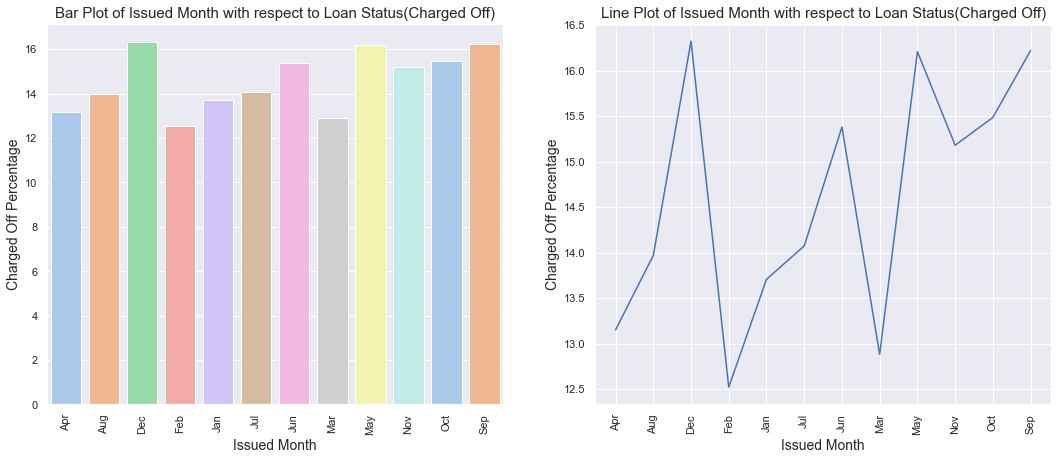

In [382]:
#Describing the Issued Month over Funded Amount Invested and Loan Status
print(loan_pivot_month.sort_values("Charged Off Percentage", ascending=False).head())

fig, ax = plt.subplots(1,2,figsize=(18, 7))

sns.barplot(data =loan_pivot_month,y='Charged Off Percentage', x='issued_Month',palette="pastel", ax = ax[0])
ax[0].set_title("Bar Plot of Issued Month with respect to Loan Status(Charged Off)", fontsize = 15)
ax[0].set_xlabel('Issued Month',fontsize=14)
ax[0].set_ylabel('Charged Off Percentage',fontsize=14)
ax[0].tick_params(axis='x', labelrotation = 90)

sns.lineplot(data =loan_pivot_month,y='Charged Off Percentage', x='issued_Month',palette="pastel", ax = ax[1])

ax[1].set_title("Line Plot of Issued Month with respect to Loan Status(Charged Off)", fontsize=15)
ax[1].set_xlabel("Issued Month",fontsize=14)
ax[1].set_ylabel("Charged Off Percentage",fontsize=14)
ax[1].tick_params(axis='x', labelrotation = 90)

plt.show()


In [383]:
# Creating a Pivot Table
loan_pivot_year = loan.pivot_table(values = 'funded_amnt_inv',
                      index = 'issued_Year',
                      columns = 'loan_status',
                      aggfunc = np.count_nonzero,
                      fill_value = 0)

loan_pivot_year['Total'] = loan_pivot_year['Charged Off'] + loan_pivot_year['Fully Paid']


loan_pivot_year['Charged Off Percentage'] = 100*(round((loan_pivot_year['Charged Off']/loan_pivot_year['Total']), 6))

loan_pivot_year = loan_pivot_year.reset_index()
loan_pivot_year["issued_Year"] = loan_pivot_year["issued_Year"].apply(lambda x : str(x))

loan_status issued_Year  Charged Off  Fully Paid  Total  \
0                  2007           41         188    229   
4                  2011         3144       16314  19458   
1                  2008          210        1155   1365   
3                  2010         1431        9589  11020   
2                  2009          567        3912   4479   

loan_status  Charged Off Percentage  
0                           17.9039  
4                           16.1579  
1                           15.3846  
3                           12.9855  
2                           12.6591  


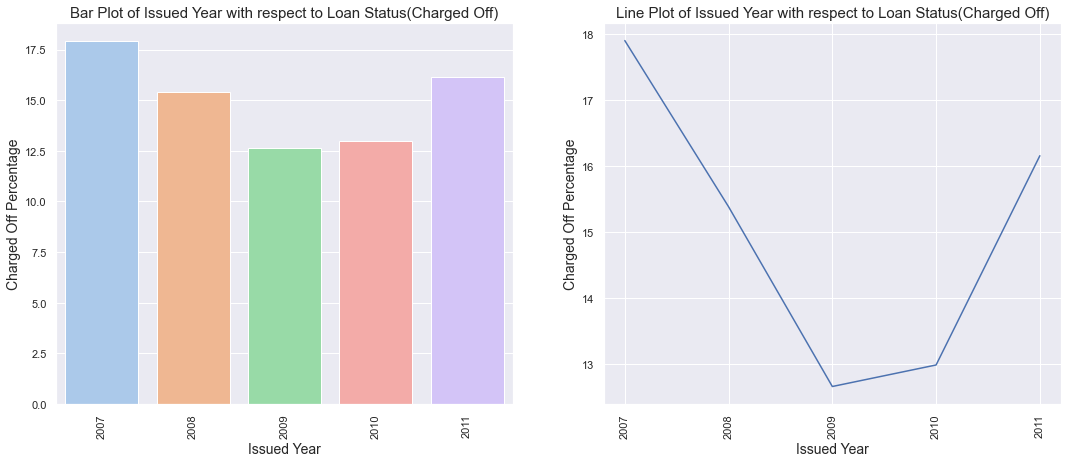

In [384]:
#Describing the Issued Year over Funded Amount Invested and Loan Status
print(loan_pivot_year.sort_values("Charged Off Percentage", ascending=False).head())


fig, ax = plt.subplots(1,2,figsize=(18, 7))

sns.barplot(data =loan_pivot_year,y='Charged Off Percentage', x='issued_Year',palette="pastel", ax = ax[0])
ax[0].set_title("Bar Plot of Issued Year with respect to Loan Status(Charged Off)", fontsize = 15)
ax[0].set_xlabel('Issued Year',fontsize=14)
ax[0].set_ylabel('Charged Off Percentage',fontsize=14)
ax[0].tick_params(axis='x', labelrotation = 90)

sns.lineplot(data =loan_pivot_year,y='Charged Off Percentage', x='issued_Year',palette="pastel", ax = ax[1])

ax[1].set_title("Line Plot of Issued Year with respect to Loan Status(Charged Off)", fontsize=15)
ax[1].set_xlabel("Issued Year",fontsize=14)
ax[1].set_ylabel("Charged Off Percentage",fontsize=14)
ax[1].tick_params(axis='x', labelrotation = 90)

plt.show()


From the above visualisations, We can say that the Top Charged Off Percentage for Issued Month and Year is
- Dec -> 16.3 %.
- Sep -> 16.2 %.
- May -> 16.2 %.

Note :- Although we have plotted graphs for Issued Months, We can ignore those plots because they are the combination of all the years but not one year. So the spread of Issued Month may give us wrong insights

----
- 2007 -> 17.9 %.
- 2011 -> 16.15 %.
- 2008 -> 15.38 %.

#### 9. Funded Amount Invested vs Grade

In [385]:
# Creating a Pivot Table
loan_pivot_grade = loan.pivot_table(values = 'funded_amnt_inv',
                      index = 'grade',
                      columns = 'loan_status',
                      aggfunc = np.count_nonzero,
                      fill_value = 0)

loan_pivot_grade['Total'] = loan_pivot_grade['Charged Off'] + loan_pivot_grade['Fully Paid']


loan_pivot_grade['Charged Off Percentage'] = 100*(round((loan_pivot_grade['Charged Off']/loan_pivot_grade['Total']), 6))

loan_pivot_grade = loan_pivot_grade.reset_index()


loan_status grade  Charged Off  Fully Paid  Total  Charged Off Percentage
6               G           95         167    262                 36.2595
5               F          289         597    886                 32.6185
4               E          660        1785   2445                 26.9939
3               D         1074        3747   4821                 22.2775
2               C         1317        6126   7443                 17.6945


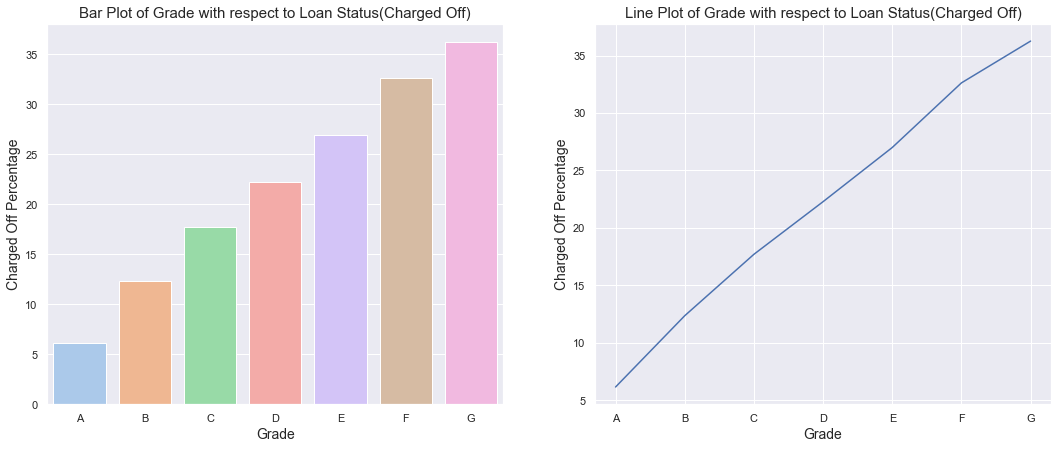

In [386]:
#Describing the Grade over Funded Amount Invested and Loan Status
print(loan_pivot_grade.sort_values("Charged Off Percentage", ascending=False).head())

fig, ax = plt.subplots(1,2,figsize=(18, 7))

sns.barplot(x = "grade",y = 'Charged Off Percentage', data = loan_pivot_grade, order=['A','B','C','D','E','F','G'], palette="pastel", ax=ax[0])
ax[0].set_title("Bar Plot of Grade with respect to Loan Status(Charged Off)", fontsize = 15)
ax[0].set_xlabel('Grade',fontsize=14)
ax[0].set_ylabel('Charged Off Percentage',fontsize=14)

sns.lineplot(data =loan_pivot_grade, y='Charged Off Percentage', x='grade' ,palette="pastel",ax=ax[1])
ax[1].set_title("Line Plot of Grade with respect to Loan Status(Charged Off)", fontsize=15)
ax[1].set_xlabel("Grade",fontsize=14)
ax[1].set_ylabel("Charged Off Percentage",fontsize=14)
plt.show()


From the above visualisation, We can say that the Top Charged Off Percentage for Grade is
- G -> 36.25 %.
- F -> 32.61 %.
- E -> 26.99 %.

Note :- There is a Strong Trend in Grades. As Grades Increases the Charged Off Percentage Increases

#### 10. Funded Amount Invested vs Sub Grade

In [387]:
# Creating a Pivot Table
loan_pivot_sub_grade = loan.pivot_table(values = 'funded_amnt_inv',
                      index = 'sub_grade',
                      columns = 'loan_status',
                      aggfunc = np.count_nonzero,
                      fill_value = 0)

loan_pivot_sub_grade['Total'] = loan_pivot_sub_grade['Charged Off'] + loan_pivot_sub_grade['Fully Paid']


loan_pivot_sub_grade['Charged Off Percentage'] = 100*(round((loan_pivot_sub_grade['Charged Off']/loan_pivot_sub_grade['Total']), 6))

loan_pivot_sub_grade = loan_pivot_sub_grade.reset_index()


loan_status sub_grade  Charged Off  Fully Paid  Total  Charged Off Percentage
29                 F5           50          48     98                 51.0204
32                 G3           19          22     41                 46.3415
34                 G5            9          13     22                 40.9091
31                 G2           26          40     66                 39.3939
30                 G1           30          58     88                 34.0909


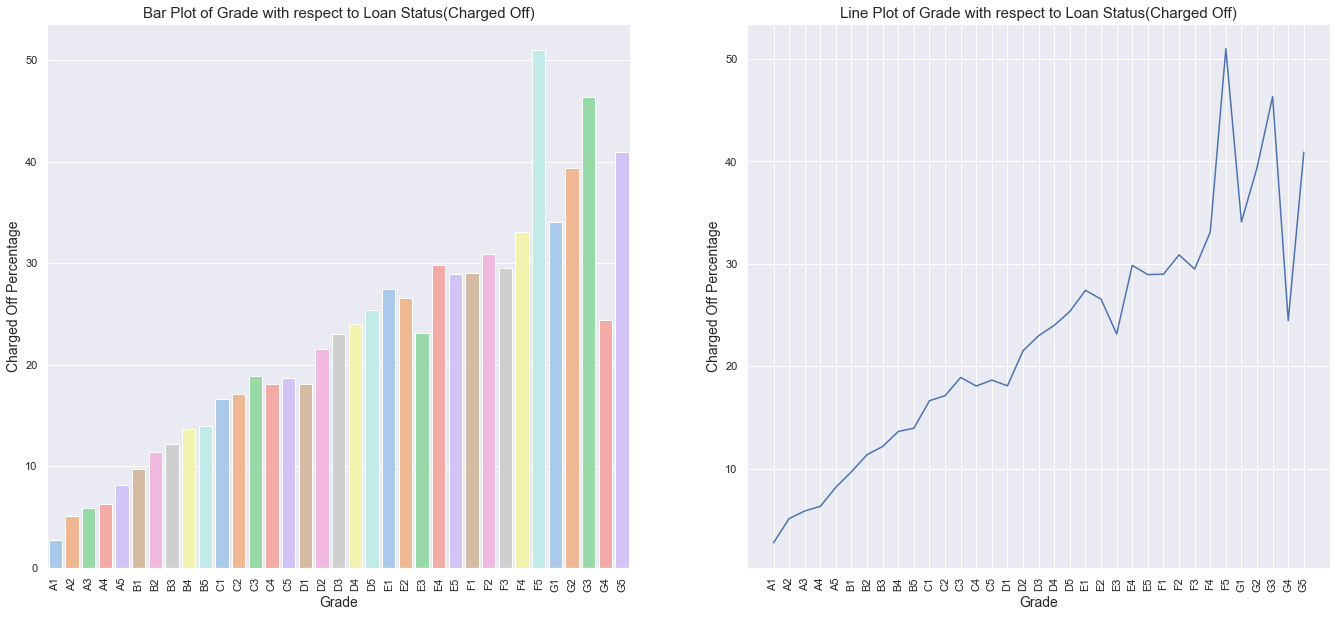

In [388]:
#Describing the Sub Grade over Funded Amount Invested and Loan Status
print(loan_pivot_sub_grade.sort_values("Charged Off Percentage", ascending=False).head())

fig, ax = plt.subplots(1,2,figsize=(23, 10))

sns.barplot(x = "sub_grade",y = 'Charged Off Percentage', data = loan_pivot_sub_grade, palette="pastel", ax=ax[0])
ax[0].set_title("Bar Plot of Grade with respect to Loan Status(Charged Off)", fontsize = 15)
ax[0].set_xlabel('Grade',fontsize=14)
ax[0].set_ylabel('Charged Off Percentage',fontsize=14)
ax[0].tick_params(axis='x', labelrotation = 90)

sns.lineplot(data =loan_pivot_sub_grade, y='Charged Off Percentage', x='sub_grade' ,palette="pastel",ax=ax[1])
ax[1].set_title("Line Plot of Grade with respect to Loan Status(Charged Off)", fontsize=15)
ax[1].set_xlabel("Grade",fontsize=14)
ax[1].set_ylabel("Charged Off Percentage",fontsize=14)
ax[1].tick_params(axis='x', labelrotation = 90)

plt.show()


From the above visualisation, We can say that the Top Charged Off Percentage for Sub Grade is
- F5 -> 51 %.
- G3 -> 46 %.
- G5 -> 40.9 %.

Note :- There is a Moderate Trend in Sub Grades. As Sub Grades Increases the Charged Off Percentage is Increased

#### 11. Funded Amount Invested vs Verification Status

In [389]:
# Creating a Pivot Table
loan_pivot_verification_status = loan.pivot_table(values = 'funded_amnt_inv',
                      index = 'verification_status',
                      columns = 'loan_status',
                      aggfunc = np.count_nonzero,
                      fill_value = 0)

loan_pivot_verification_status['Total'] = loan_pivot_verification_status['Charged Off'] + loan_pivot_verification_status['Fully Paid']


loan_pivot_verification_status['Charged Off Percentage'] = 100*(round((loan_pivot_verification_status['Charged Off']/loan_pivot_verification_status['Total']), 6))

loan_pivot_verification_status = loan_pivot_verification_status.reset_index()


loan_status verification_status  Charged Off  Fully Paid  Total  \
2                      Verified         1943        9268  11211   
1               Source Verified         1373        7787   9160   
0                  Not Verified         2077       14103  16180   

loan_status  Charged Off Percentage  
2                           17.3312  
1                           14.9891  
0                           12.8368  


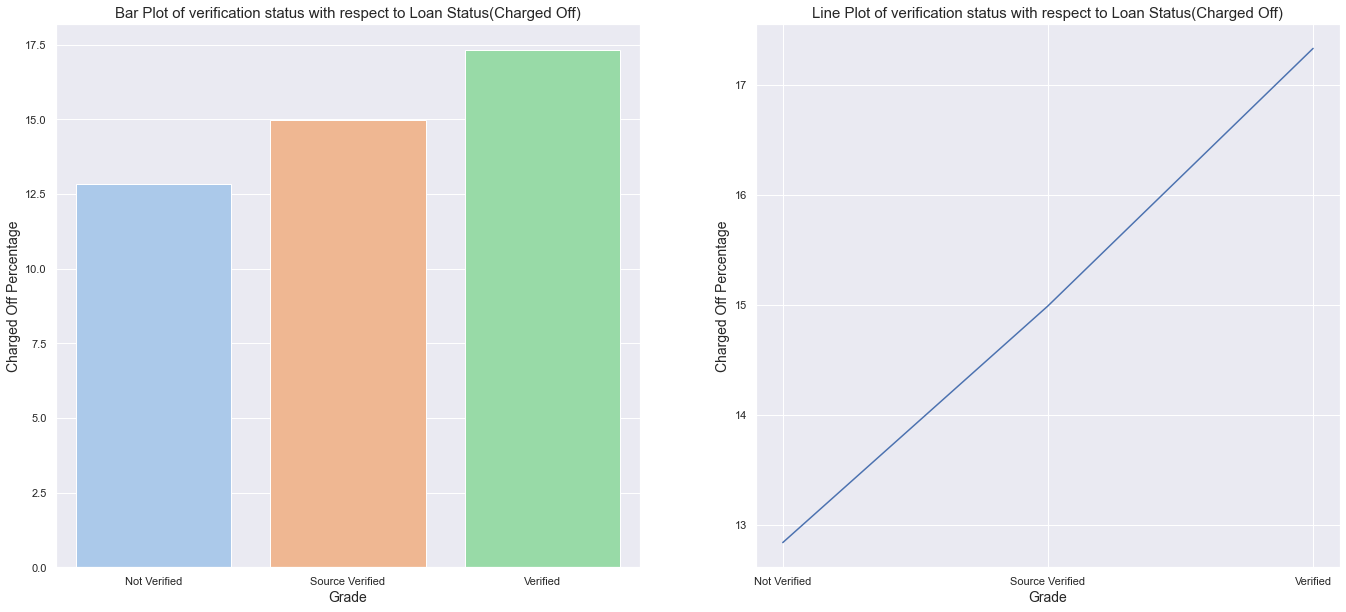

In [390]:
#Describing the Verification Status over Funded Amount Invested and Loan Status
print(loan_pivot_verification_status.sort_values("Charged Off Percentage", ascending=False).head())

fig, ax = plt.subplots(1,2,figsize=(23, 10))

sns.barplot(x = "verification_status",y = 'Charged Off Percentage', data = loan_pivot_verification_status , palette="pastel", ax = ax[0])
ax[0].set_title("Bar Plot of verification status with respect to Loan Status(Charged Off)", fontsize = 15)
ax[0].set_xlabel('Grade',fontsize=14)
ax[0].set_ylabel('Charged Off Percentage',fontsize=14)

sns.lineplot(x = "verification_status",y = 'Charged Off Percentage', data = loan_pivot_verification_status , palette="pastel", ax = ax[1])
ax[1].set_title("Line Plot of verification status with respect to Loan Status(Charged Off)", fontsize=15)
ax[1].set_xlabel("Grade",fontsize=14)
ax[1].set_ylabel("Charged Off Percentage",fontsize=14)

plt.show()


From the above visualisation, We can say that the Top Charged Off Percentage for Verification status is
- Verified -> 17.33 %.
- Source Verified -> 14.98 %.
- Not Verified -> 12.83 %.

#### 12. Funded Amount Invested vs DTI

In [391]:
# Creating a Pivot Table
loan_pivot_dti = loan.pivot_table(values = 'funded_amnt_inv',
                      index = 'dti_groups',
                      columns = 'loan_status',
                      aggfunc = np.count_nonzero,
                      fill_value = 0)

loan_pivot_dti['Total'] = loan_pivot_dti['Charged Off'] + loan_pivot_dti['Fully Paid']


loan_pivot_dti['Charged Off Percentage'] = 100*(round((loan_pivot_dti['Charged Off']/loan_pivot_dti['Total']), 6))

loan_pivot_dti = loan_pivot_dti.reset_index()


loan_status dti_groups  Charged Off  Fully Paid  Total  Charged Off Percentage
4                20-25         1103        5359   6462                 17.0690
3                15-20         1343        7178   8521                 15.7611
2                10-15         1340        7794   9134                 14.6705
5                25-30           87         530    617                 14.1005
1                 5-10          936        6298   7234                 12.9389


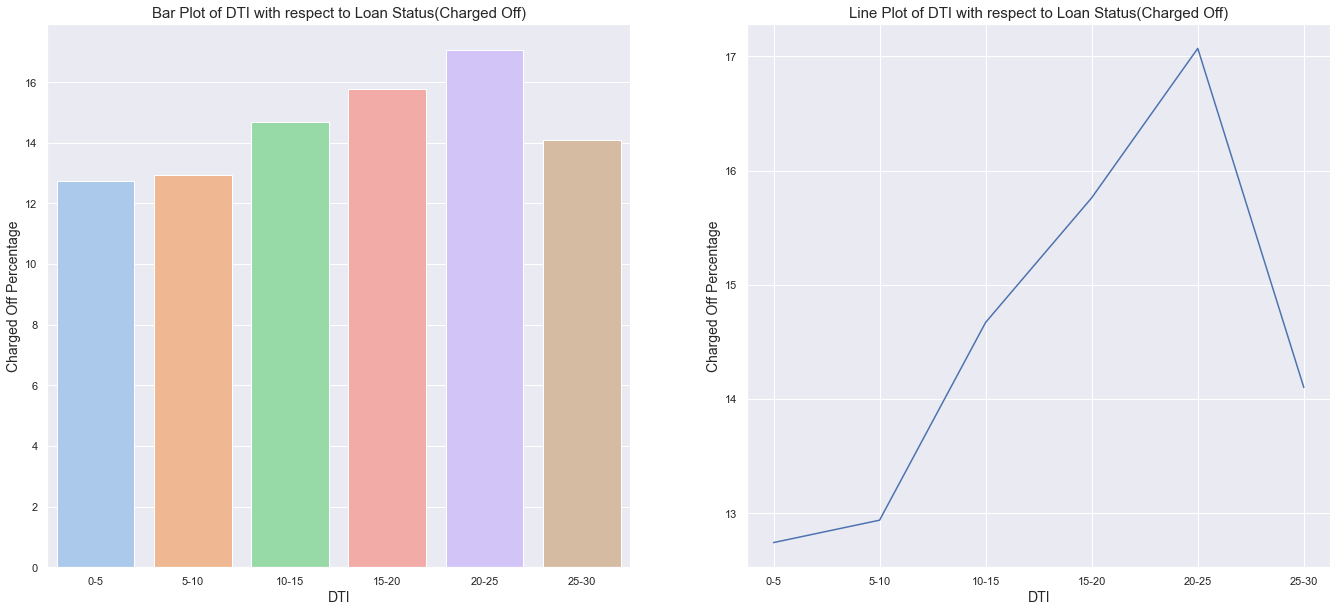

In [392]:
#Describing the DTI values over Funded Amount Invested and Loan Status
print(loan_pivot_dti.sort_values("Charged Off Percentage", ascending=False).head())

fig, ax = plt.subplots(1,2,figsize=(23, 10))

sns.barplot(x = "dti_groups",y = 'Charged Off Percentage', data = loan_pivot_dti , palette="pastel", ax = ax[0])
ax[0].set_title("Bar Plot of DTI with respect to Loan Status(Charged Off)", fontsize = 15)
ax[0].set_xlabel('DTI',fontsize=14)
ax[0].set_ylabel('Charged Off Percentage',fontsize=14)

sns.lineplot(x = "dti_groups",y = 'Charged Off Percentage', data = loan_pivot_dti , palette="pastel", ax = ax[1])
ax[1].set_title("Line Plot of DTI with respect to Loan Status(Charged Off)", fontsize=15)
ax[1].set_xlabel("DTI",fontsize=14)
ax[1].set_ylabel("Charged Off Percentage",fontsize=14)

plt.show()


From the above visualisation, We can say that the Top Charged Off Percentage for DTI is
- 20-25 % -> 17.06 %.
- 15-20 % -> 15.76 %.

Note :- There is not much data for 25-30 % group of DTI. SO there is a downwall in the graphs in this region.

Ideally, We can say that there is moderately strong Trend. As DTI Increases the Charged Off Rate increases.

#### 13. Grade vs Interest Rate

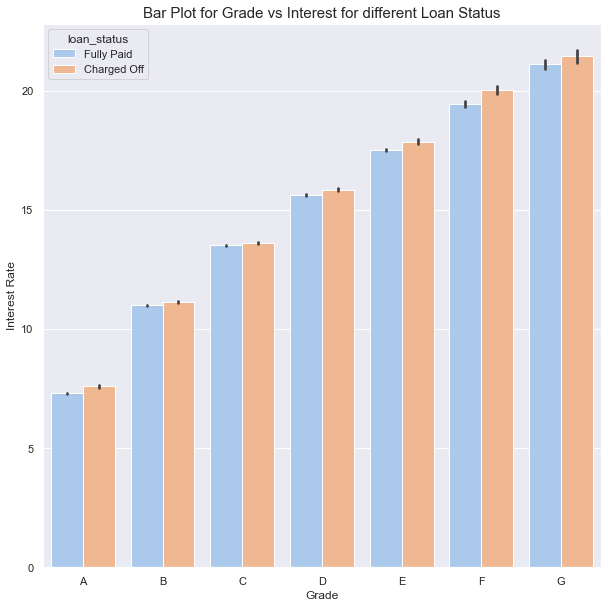

In [401]:
plt.figure(figsize=(10,10))
sns.barplot(data =loan,y='int_rate', x='grade', hue ='loan_status',palette="pastel", order=['A','B','C','D','E','F','G'])
plt.title("Bar Plot for Grade vs Interest for different Loan Status", fontsize=15)
plt.xlabel("Grade")
plt.ylabel("Interest Rate")

plt.show()

From the above visualisation, We can say that 

- The Interest Rate and Grade has Strong Trend. As Grade Increases the Interest Rate Increases so does Charged Off values.



#### 14. Annual Income vs Home Ownership

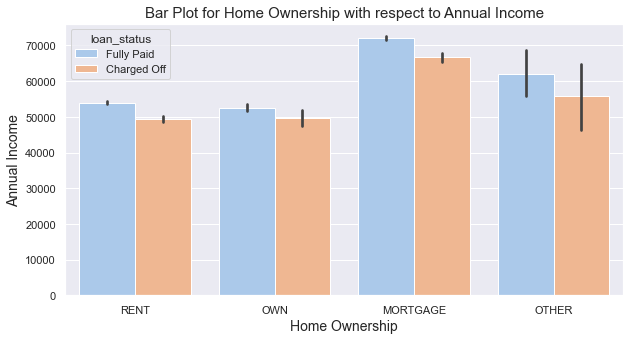

In [394]:
plt.figure(figsize=(10,5))
sns.barplot(data =loan,x='home_ownership', y='annual_inc', hue ='loan_status',palette="pastel")
plt.title("Bar Plot for Home Ownership with respect to Annual Income", fontsize=15)
plt.xlabel("Home Ownership", fontsize=14)
plt.ylabel("Annual Income", fontsize=14)
plt.show()

From the previous Plots (Home Ownership vs Funded Amount Invested) we got to know that the below categories of Home Ownership has more Charged Off loans.
- OTHER -> 17.2 %.
- RENT -> 15.35 %.
- OWN -> 15.21 %.

From the above visualization we can say that :-
- It is not suggested to provide the loan if the Annual income is 58000 and Home Ownership is of type "OTHER"
- It is not suggested to provide the loan if the Annual income is 49500 and Home Ownership is of type "RENT"
- It is not suggested to provide the loan if the Annual income is 49000 and Home Ownership is of type "OWN"

#### 15. Annual Income vs Interest Rate

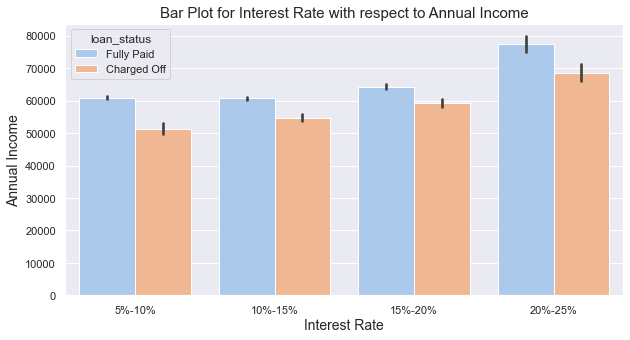

In [395]:
plt.figure(figsize=(10,5))
sns.barplot(data =loan,x='int_rate_groups', y='annual_inc', hue ='loan_status',palette="pastel")
plt.title("Bar Plot for Interest Rate with respect to Annual Income", fontsize=15)
plt.xlabel("Interest Rate", fontsize=14)
plt.ylabel("Annual Income", fontsize=14)
plt.show()

From the previous Plots (Interest Rate vs Funded Amount Invested) we got to know that the below categories of Interest Rates has more Charged Off loans.

- 20-25% -> 39.03 %.
- 15-20% -> 24.46 %.

From the above visualization we can say that :-

- It is not suggested to provide the loan if the Annual income is 6700 and Interest Rate is between 20 to 25 %
- It is not suggested to provide the loan if the Annual income is 59000 and Interest Rate is between 15 to 20 %


#### 16. Home Ownership vs Purpose

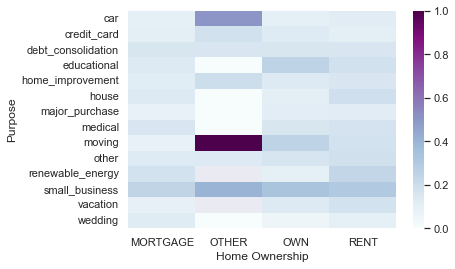

In [396]:
loan['loan_status_binary'] = loan['loan_status'].apply(lambda x: 1 if x=='Charged Off' else 0)

loan_pivot_bin = pd.pivot_table(data=loan, values='loan_status_binary', index= "purpose", columns="home_ownership")
sns.heatmap(loan_pivot_bin, cmap='BuPu')
plt.xlabel("Home Ownership")
plt.ylabel("Purpose")
plt.show()

From the above visualization we can say that :-
- For Home Ownership with Values "OTHER", There is a positive correlation for Purpose values - "moving","car","small_business"

#### 16. Annual Income vs Purpose

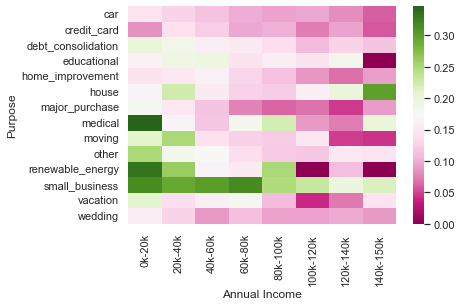

In [397]:
loan_pivot_annual_purpose = pd.pivot_table(data=loan, values='loan_status_binary', index= "purpose", columns="annual_inc_groups")
sns.heatmap(loan_pivot_annual_purpose, cmap='PiYG')
plt.xlabel("Annual Income")
plt.ylabel("Purpose")
plt.show()

From the above visualization we can say that :-
- For Annual Income in the range 0k to 20k it is better not to provide loans for the purposes "medical", "renewable_energy", "small_business"

## Correlation 

In [398]:
#Calculating a Correlation Matrix for Loan Status == Charged Off
charged_off = loan[loan.loan_status == "Charged Off"].corr()
charged_off = charged_off.drop(['loan_status_binary'], axis=0)
charged_off = charged_off.drop(['loan_status_binary'], axis=1)
charged_off

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,emp_length,annual_inc,dti,pub_rec_bankruptcies,issued_Year
loan_amnt,1.0000,0.9802,0.9073,0.3389,0.9266,0.1603,0.4591,0.0776,-0.0204,0.1202
funded_amnt,0.9802,1.0000,0.9260,0.3421,0.9534,0.1657,0.4540,0.0730,-0.0257,0.1322
funded_amnt_inv,0.9073,0.9260,1.0000,0.3585,0.8564,0.1766,0.4124,0.0863,-0.0296,0.3141
int_rate,0.3389,0.3421,0.3585,1.0000,0.3160,0.0143,0.1523,0.0424,0.0802,0.1759
installment,0.9266,0.9534,0.8564,0.3160,1.0000,0.1339,0.4560,0.0542,-0.0180,0.0307
emp_length,0.1603,0.1657,0.1766,0.0143,0.1339,1.0000,0.1587,0.0665,0.0680,0.1379
annual_inc,0.4591,0.4540,0.4124,0.1523,0.4560,0.1587,1.0000,-0.0286,0.0299,0.0067
dti,0.0776,0.0730,0.0863,0.0424,0.0542,0.0665,-0.0286,1.0000,0.0184,0.0961
pub_rec_bankruptcies,-0.0204,-0.0257,-0.0296,0.0802,-0.0180,0.0680,0.0299,0.0184,1.0000,-0.0020
issued_Year,0.1202,0.1322,0.3141,0.1759,0.0307,0.1379,0.0067,0.0961,-0.0020,1.0000


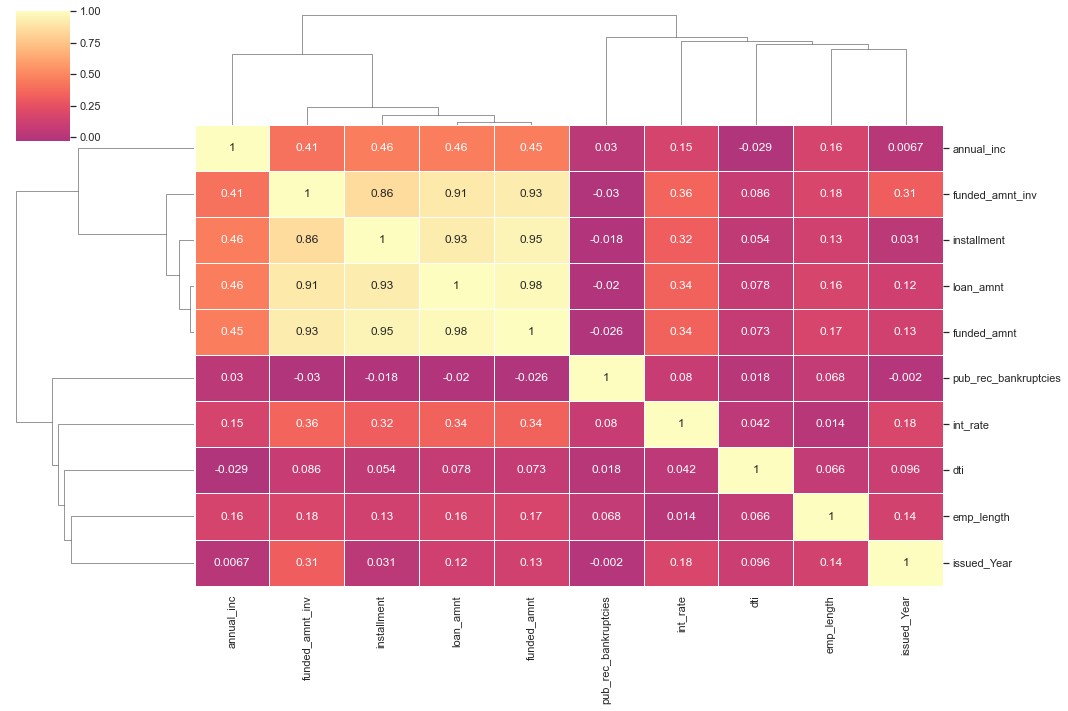

In [399]:
sns.clustermap(charged_off, center = 0, cmap = 'magma', linewidths = 0.75, figsize = (15, 10), annot=True)
plt.show()

From the above Visualisation we can say that :-

- funded_amnt, loan_amnt, installment and funded_amnt_inv are highly positively correlated to each other. They form a cluster.
- dti is highly positively correlated to issues_Year and vice-versa.

## Observations :-

#### These are the major variables that helped us to perform Data Analysis :-
    1. Loan Purpose
    2. Employment Length
    3. Interest Rate
    4. Annual Income
    5. Grade and Sub Grade
    6. Term
    7. Issued Month and Year
    8. Verification Status
    9. Home Ownership
    10. DTI

### Insights :-

#### 1. Loan Purpose :-
- small_business -> 27.95 %. (Out of 1624 loans taken by keeping loan purpose as "small_business" 454 loans Charged Off)
- renewable_energy -> 19.14 %. (Out of 94 loans taken by keeping loan purpose as "renewable_energy" 18 loans Charged Off)
- educational -> 17.70 %. (Out of 305 loans taken by keeping loan purpose as "educational" 54 loans Charged Off)

#### 2. Employment Length
The Charged Off Percentage is high for the Loans where the Employment length is greater than equalt to 10+ Years. 
- 10 Years (> 10 Years) -> 16.78 %.
- 7 Years -> 15.28 %.
- 1 Year -> 14.64 %.

#### 3. Interest Rate
Charged Off Percentage is high for Interest Rates :-
- 20-25% -> 39.03 %.
- 15-20% -> 24.46 %.

These are some of the suggested metrics:-

- It is not suggested to provide the loan if the Annual income is 67000 and Interest Rate is between 20 to 25 %
- It is not suggested to provide the loan if the Annual income is 59000 and Interest Rate is between 15 to 20 %
- It is suggested to not to give loans if the people have Funded amount Invested as 35000 and Interest Rate is above 15%


#### 4. Annual Income
Charged Off Percentage is high for Annual Incomes :-
- 0-20k -> 19.9262 %.
- 20k-40k -> 17.6959 %.
- 40k-60k -> 15.4648 %.

These are some of the suggested metrics
- For Annual Income in the range 0k to 20k it is better not to provide loans for the purposes "medical", "renewable_energy", "small_business"
- If the Annual Income is greater than 60,000 and the Interest rate is above 15% then loan is not suggested

#### 5. Grade and Sub Grade
Most of the Charged Off Applicants belong to Grades G,F,E
For Grades G,F the most charged off Sub grades are :- 
- G -> G3, G5
- F -> F4, F5

Grade and Charged Off Percentage are strongly correlated

#### Note :- As the Grade Increases the Charged Off Percentage also increases.

Order -> G,F,E,D,C,B,A

#### 6. Term

For Term, As the Term increases the Charged Off Percentage also Increases

#### 7. Issued Month and Year
- Dec -> 16.3 %.
- Sep -> 16.2 %.
- May -> 16.2 %.

Note :- Although we have plotted graphs for Issued Months, We can ignore those plots because they are the combination of all the years but not one year. So the spread of Issued Month may give us wrong insights

- 2007 -> 17.9 %.
- 2011 -> 16.15 %.
- 2008 -> 15.38 %.

#### 8. Verification Status
Charged Off Percentage is high for the Verification Statuses :- 
- Verified -> 17.33 %.
- Source Verified -> 14.98 %.
- Not Verified -> 12.83 %.

#### 9. Home Ownership
Charged Off Percentage is high for the  Home Ownership values :-
- OTHER -> 17.2 %.
- RENT -> 15.35 %.
- OWN -> 15.21 %.

These are some of the suggested metrics :-

- It is not suggested to provide the loan if the Annual income is 58000 and Home Ownership is of type "OTHER"
- It is not suggested to provide the loan if the Annual income is 49500 and Home Ownership is of type "RENT"
- It is not suggested to provide the loan if the Annual income is 49000 and Home Ownership is of type "OWN"

#### 10. DTI
Charged Off Percentage is high for the DTI values :-
- 20-25 % -> 17.06 %.
- 15-20 % -> 15.76 %.

Note :- There is not much data for 25-30 % group of DTI. SO there is a downwall in the graphs in this region.

Ideally, We can say that there is moderately strong Trend. As DTI Increases the Charged Off Rate increases.


### Insights - Univariate vs Bivariate
- Although we got insights from Univariate analysis at the begining those insight were contridicted when we performed Bivariate analysis
Examples :-
    1. Grades - The Univariate Analysis gave almost the opposite insights of Bivariate Analysis,
    2. Term
    3. Sub Grades,..

## Final Conclusion

- Less Impact Metrics :-
    - Lower Annual Income, In the range 20,000 to 40,000.
    - Higher Debt to Income Ratio, Betwen 15% - 20%.
    - Higher Loan Amount (Above 15600)
    - Loan Purpose - Education
    - Loan Grade and Subgrade - B and C

- High Impact Metrics :-
    - Loan Grade and Subgrade - Greater than D
    - Loan Purpose - Small Business, Renewable Energy
    - High Interest Rate - above 15%
    - Lower Annual Income - Below 20,000
    
- Combined Impact above metrics :-
    - Home Ownership vs Loan Purpose - Other vs moving, car, small_business
    - Annual Income vs Loan Purpose - 0k to 20k it is better not to provide loans for the purposes "medical", "renewable_energy", "small_business"
    
    
### Note :- It is better to not to provide loans if the borrower doesn't have data regarding "Annual Income"